# **Imports and Libraries for Analysis**

In [1]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 10.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.4 MB/s 
     |████████████████████████████████| 16.7 MB 481 kB/s 


In [4]:
!pip install --upgrade pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 243 kB 40.5 MB/s 
     |████████████████████████████████| 5.7 MB 40.0 MB/s 
     |████████████████████████████████| 147 kB 44.7 MB/s 
     |████████████████████████████████| 41 kB 450 kB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 2.1 MB 41.1 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 183 kB 56.4 MB/s 
     |████████████████████████████████| 1.0 MB 53.7 MB/s 
     |████████████████████████████████| 14.2 MB 56.4 MB/s 
     |████████████████████████████████| 19.3 MB 8.4 MB/s 
     |████████████████████████████████| 132 kB 56.7 MB/s 
     |████████████████████████████████| 9.3 MB 41.3 MB/s 
     |████████████████████████████████| 

In [2]:
!pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.6 MB/s 
     |████████████████████████████████| 116 kB 57.8 MB/s 
     |████████████████████████████████| 60 kB 6.5 MB/s 
     |████████████████████████████████| 2.4 MB 49.4 MB/s 
     |████████████████████████████████| 179 kB 54.7 MB/s 
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122781 sha256=c750b6f52799dbac615a91aa113b1548f49ecf595016896e8fcabbcda7c2edd3
  Stored in directory: /root/.cache/pip/wheels/37/07/2e/2aa4874ca25fa442a3912c74e53780da19d25ec1d58bac5d30
Successfully built esda


In [3]:
!pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Install geemap for Interacting with Google Earth Engine API
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

geemap package not installed. Installing ...


In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! pip install matplotlib-scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Statistical Analysis Libraries
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
import statsmodels.api as sm

# Accesing Google Earth Engine APIs for Satelite Imagery Handling
import ee
import geemap

# Importing Spatial Analysis Libraries
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import splot
from esda.moran import Moran, Moran_Local
import esda
import libpysal as lps
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation
from pysal.model import spreg
from pysal.lib import weights

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Peel Boundaries at Dissemination Area Level**

In [3]:
# Import Dissemination Area Boundary Data
peel_da_boundaries = gpd.read_file('/content/drive/MyDrive/GGR442_Project3_Data/2016_Census_DA.geojson')
peel_da_boundaries.head(10)

OBJECTID     DAUID PRUID   PRNAME CDUID CDNAME CDTYPE   CCSUID  CCSNAME  \
0      4055  35211603    35  Ontario  3521   Peel     RM  3521024  Caledon   
1      4067  35211604    35  Ontario  3521   Peel     RM  3521024  Caledon   
2      4092  35210014    35  Ontario  3521   Peel     RM  3521024  Caledon   
3      4093  35210015    35  Ontario  3521   Peel     RM  3521024  Caledon   
4      4094  35210017    35  Ontario  3521   Peel     RM  3521024  Caledon   
5      4095  35211615    35  Ontario  3521   Peel     RM  3521024  Caledon   
6      4096  35211616    35  Ontario  3521   Peel     RM  3521024  Caledon   
7      4097  35211617    35  Ontario  3521   Peel     RM  3521024  Caledon   
8      4098  35211618    35  Ontario  3521   Peel     RM  3521024  Caledon   
9      4099  35211619    35  Ontario  3521   Peel     RM  3521024  Caledon   

    CSDUID  ... Mobility5_Movers Mobility5_Non_migrants Mobility5_Migrants  \
0  3521024  ...            315.0                  105.0              210.0   
1  3521024  ...            230.0                  110.0              115.0   
2  3521024  ...            205.0                   45.0              155.0   
3  3521024  ...            115.0                   45.0               70.0   
4  3521024  ...            205.0                   55.0              150.0   
5  3521024  ...            255.0                   55.0              200.0   
6  3521024  ...             85.0                   35.0               50.0   
7  3521024  ...            130.0                   10.0              125.0   
8  3521024  ...            100.0                    0.0               95.0   
9  3521024  ...             85.0                   10.0               75.0   

  Mobility5_Internal_migrants Mobility5_Intraprovincial_migra  \
0                       210.0                           210.0   
1                       115.0                           105.0   
2                       155.0                           145.0   
3                        60.0                            55.0   
4                       145.0                           140.0   
5                       200.0                           205.0   
6                        45.0                            45.0   
7                       125.0                           125.0   
8                        95.0                           100.0   
9                        75.0                            75.0   

  Mobility5_Interprovincial_migra Mobility5_External_migrants SHAPE_Length  \
0                             0.0                         0.0     0.202727   
1                            10.0                         0.0     0.253848   
2                            10.0                         0.0     0.152793   
3                            10.0                        15.0     0.171581   
4                            10.0                         0.0     0.211042   
5                             0.0                        10.0     0.275134   
6                             0.0                        10.0     0.302833   
7                             0.0                         0.0     0.112284   
8                             0.0                         0.0     0.096395   
9                             0.0                         0.0     0.096173   

  SHAPE_Area                                           geometry  
0   0.001740  MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...  
1   0.003098  MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...  
2   0.001292  MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...  
3   0.001747  MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...  
4   0.002237  MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...  
5   0.003125  MULTIPOLYGON (((-79.91559 43.80088, -79.91566 ...  
6   0.002844  MULTIPOLYGON (((-79.92523 43.86091, -79.92387 ...  
7   0.000470  MULTIPOLYGON (((-79.97298 43.86101, -79.97063 ...  
8   0.000463  MULTIPOLYGON (((-79.99101 43.86462, -79.99201 ...  
9   0.000476  MULTIPOLYGON (((-80.00640 43.85145, 

In [4]:
# Description of Peel 2016 DA Boundaries 
print(peel_da_boundaries.shape)
peel_da_boundaries.dtypes

(1650, 314)


OBJECTID                              int64
DAUID                                object
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [5]:
peel_da_boundaries['DAUID'] = pd.to_numeric(peel_da_boundaries['DAUID'])
peel_da_boundaries.dtypes

OBJECTID                              int64
DAUID                                 int64
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

# **Exploring and Mapping NO$_{2}$ in Peel Region**

In [6]:
# Import 2016 NO2 Data
no2_2016_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_16.csv')
no2_2016_data_df.head(10)

# Drop the useless geometry column
no2_2016_data_df = no2_2016_data_df.drop('geometry', axis = 1)
no2_2016_data_df.head(5)

DAUID  PRUID   PRNAME  CDUID CDNAME CDTYPE   CCSUID   CCSNAME   CSDUID  \
0  35210188     35  Ontario   3521   Peel     RM  3521010  Brampton  3521010   
1  35210189     35  Ontario   3521   Peel     RM  3521010  Brampton  3521010   
2  35210190     35  Ontario   3521   Peel     RM  3521010  Brampton  3521010   
3  35210191     35  Ontario   3521   Peel     RM  3521010  Brampton  3521010   
4  35210192     35  Ontario   3521   Peel     RM  3521010  Brampton  3521010   

    CSDNAME  ... SACCODE  SACTYPE CMAUID  CMAPUID  CMANAME  CMATYPE  \
0  Brampton  ...     535        1    535    35535  Toronto        B   
1  Brampton  ...     535        1    535    35535  Toronto        B   
2  Brampton  ...     535        1    535    35535  Toronto        B   
3  Brampton  ...     535        1    535    35535  Toronto        B   
4  Brampton  ...     535        1    535    35535  Toronto        B   

        CTUID  CTNAME    ADAUID    APMean  
0  5350574.00  574.00  35210060  9.193614  
1  5350572.01  572.01  35210068  9.106378  
2  5350572.01  572.01  35210068  9.191899  
3  5350572.01  572.01  35210068  9.180195  
4  5350572.01  572.01  35210068  9.138650  

[5 rows x 23 columns]

In [7]:
# Description of Peel 2016 NO2 Data
print(no2_2016_data_df.shape)
no2_2016_data_df.dtypes

(1650, 23)


DAUID        int64
PRUID        int64
PRNAME      object
CDUID        int64
CDNAME      object
CDTYPE      object
CCSUID       int64
CCSNAME     object
CSDUID       int64
CSDNAME     object
CSDTYPE     object
ERUID        int64
ERNAME      object
SACCODE      int64
SACTYPE      int64
CMAUID       int64
CMAPUID      int64
CMANAME     object
CMATYPE     object
CTUID      float64
CTNAME     float64
ADAUID       int64
APMean     float64
dtype: object

In [8]:
# Merge Peel Boundary Files to 2016 NO2 Air Pollution
peel_no2_2016_df = peel_da_boundaries.merge(no2_2016_data_df, on = 'DAUID')
peel_no2_2016_df

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0         4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1         4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2         4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3         4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4         4094  35210017      35  Ontario    3521     Peel       RM  3521024   
...        ...       ...     ...      ...     ...      ...      ...      ...   
1645      8854  35212107      35  Ontario    3521     Peel       RM  3521010   
1646      8855  35212118      35  Ontario    3521     Peel       RM  3521010   
1647      8856  35212119      35  Ontario    3521     Peel       RM  3521010   
1648      8869  35212082      35  Ontario    3521     Peel       RM  3521010   
1649      8870  35212083      35  Ontario    3521     Peel       RM  3521010   

     CCSNAME_x CSDUID_x  ... SACCODE_y SACTYPE_y CMAUID_y CMAPUID_y CMANAME_y  \
0      Caledon  3521024  ...       535         1      535     35535   Toronto   
1      Caledon  3521024  ...       535         1      535     35535   Toronto   
2      Caledon  3521024  ...       535         1      535     35535   Toronto   
3      Caledon  3521024  ...       535         1      535     35535   Toronto   
4      Caledon  3521024  ...       535         1      535     35535   Toronto   
...        ...      ...  ...       ...       ...      ...       ...       ...   
1645  Brampton  3521005  ...       535         1      535     35535   Toronto   
1646  Brampton  3521005  ...       535         1      535     35535   Toronto   
1647  Brampton  3521005  ...       535         1      535     35535   Toronto   
1648  Brampton  3521005  ...       535         1      535     35535   Toronto   
1649  Brampton  3521005  ...       535         1      535     35535   Toronto   

     CMATYPE_y     CTUID_y CTNAME_y  ADAUID_y     APMean  
0            B  5350585.07   585.07  35210001   3.485749  
1            B  5350585.07   585.07  35210001   3.391727  
2            B  5350586.01   586.01  35210009   4.349299  
3            B  5350586.02   586.02  35210009   4.382483  
4            B  5350586.02   586.02  35210009   4.400571  
...        ...         ...      ...       ...        ...  
1645         B  5350501.02   501.02  35210151   8.945420  
1646         B  5350525.02   525.02  35210079  13.901781  
1647         B  5350525.02   525.02  35210079  13.989701  
1648         B  5350526.02   526.02  35210073  11.725460  
1649         B  5350526.02   526.02  35210073  12.420853  

[1650 rows x 336 columns]

In [9]:
# Ensure that geometry is retained with 2016 NO2 Data
peel_no2_2016_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

In [10]:
# Mean NO2 Air Pollution by City in Peel
peel_no2_2016_df.groupby('CSDNAME_y').agg({'APMean': 'mean'})

APMean
CSDNAME_y             
Brampton      8.788531
Caledon       4.380533
Mississauga  10.451526

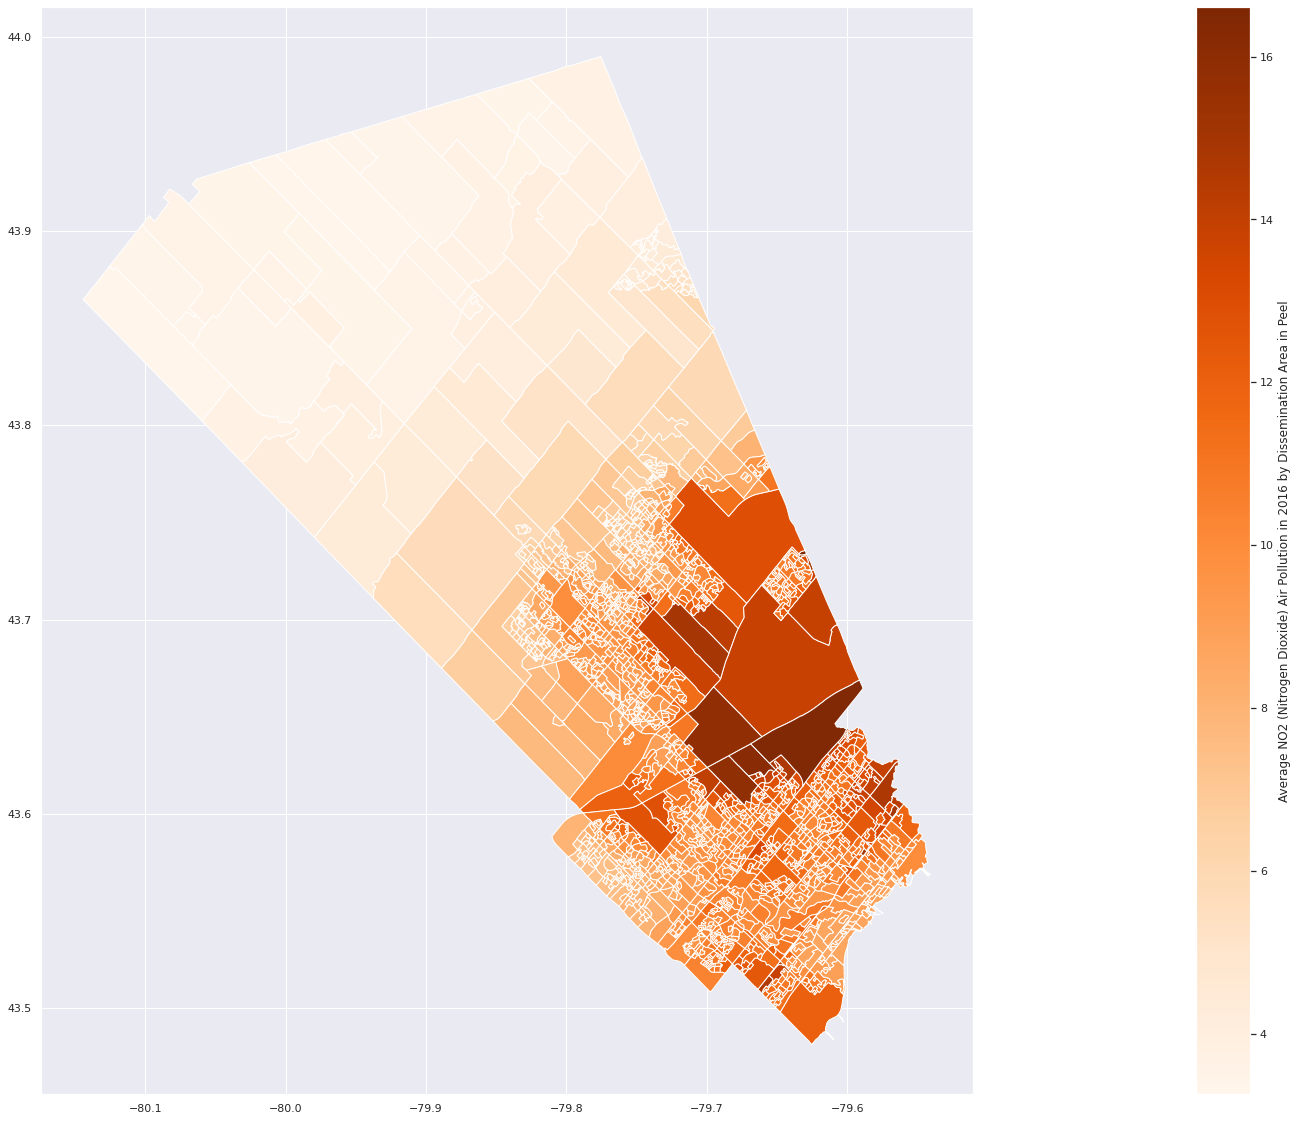

In [11]:
# Chloropleth Map of NO2 Air Pollution in 2016 for Peel Region
peel_no2_2016_df.plot(column = "APMean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) Air Pollution in 2016 by Dissemination Area in Peel"},
                      cmap = "Oranges");

In [12]:
# Import 2011 NO2 Data
no2_2011_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_11.csv')
no2_2011_data_df.head(10)

# Drop the useless geometry column
no2_2011_data_df = no2_2011_data_df.drop('geometry', axis = 1)
no2_2011_data_df.head(5)

DAUID  CDUID CDNAME CDTYPE   CSDUID      CSDNAME CSDTYPE   CCSUID  \
0  35210167   3521   Peel     RM  3521010     Brampton      CY  3521010   
1  35210121   3521   Peel     RM  3521010     Brampton      CY  3521010   
2  35210456   3521   Peel     RM  3521005  Mississauga      CY  3521005   
3  35211089   3521   Peel     RM  3521005  Mississauga      CY  3521005   
4  35211967   3521   Peel     RM  3521005  Mississauga      CY  3521005   

       CCSNAME  ERUID  ... CMAUID  CMANAME  CMATYPE SACCODE SACTYPE  \
0     Brampton   3530  ...    535  Toronto        B     535       1   
1     Brampton   3530  ...    535  Toronto        B     535       1   
2  Mississauga   3530  ...    535  Toronto        B     535       1   
3  Mississauga   3530  ...    535  Toronto        B     535       1   
4  Mississauga   3530  ...    535  Toronto        B     535       1   

        CTUID  CTNAME  PRUID   PRNAME     APMean  
0  5350575.01  575.01     35  Ontario  11.468890  
1  5350564.01  564.01     35  Ontario  13.360573  
2  5350516.09  516.09     35  Ontario  15.225655  
3  5350529.01  529.01     35  Ontario  14.057582  
4  5350516.42  516.42     35  Ontario  10.000008  

[5 rows x 22 columns]

In [13]:
# Merge Peel Boundary Files to 2011 NO2 Air Pollution
peel_no2_2011_df = peel_da_boundaries.merge(no2_2011_data_df, on = 'DAUID')
peel_no2_2011_df

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0         4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1         4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2         4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3         4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4         4094  35210017      35  Ontario    3521     Peel       RM  3521024   
...        ...       ...     ...      ...     ...      ...      ...      ...   
1605      8854  35212107      35  Ontario    3521     Peel       RM  3521010   
1606      8855  35212118      35  Ontario    3521     Peel       RM  3521010   
1607      8856  35212119      35  Ontario    3521     Peel       RM  3521010   
1608      8869  35212082      35  Ontario    3521     Peel       RM  3521010   
1609      8870  35212083      35  Ontario    3521     Peel       RM  3521010   

     CCSNAME_x CSDUID_x  ... CMAUID_y CMANAME_y CMATYPE_y SACCODE_y SACTYPE_y  \
0      Caledon  3521024  ...      535   Toronto         B       535         1   
1      Caledon  3521024  ...      535   Toronto         B       535         1   
2      Caledon  3521024  ...      535   Toronto         B       535         1   
3      Caledon  3521024  ...      535   Toronto         B       535         1   
4      Caledon  3521024  ...      535   Toronto         B       535         1   
...        ...      ...  ...      ...       ...       ...       ...       ...   
1605  Brampton  3521005  ...      535   Toronto         B       535         1   
1606  Brampton  3521005  ...      535   Toronto         B       535         1   
1607  Brampton  3521005  ...      535   Toronto         B       535         1   
1608  Brampton  3521005  ...      535   Toronto         B       535         1   
1609  Brampton  3521005  ...      535   Toronto         B       535         1   

         CTUID_y CTNAME_y PRUID_y PRNAME_y     APMean  
0     5350585.07   585.07      35  Ontario   4.499027  
1     5350585.07   585.07      35  Ontario   4.398460  
2     5350586.01   586.01      35  Ontario   5.642140  
3     5350586.02   586.02      35  Ontario   5.708934  
4     5350586.02   586.02      35  Ontario   5.751850  
...          ...      ...     ...      ...        ...  
1605  5350501.02   501.02      35  Ontario  11.621174  
1606  5350525.02   525.02      35  Ontario  18.087823  
1607  5350525.02   525.02      35  Ontario  18.205494  
1608  5350526.02   526.02      35  Ontario  15.246634  
1609  5350526.02   526.02      35  Ontario  16.165817  

[1610 rows x 335 columns]

In [14]:
# Ensure that geometry is retained with 2011 NO2 Data
peel_no2_2011_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1605    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1606    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1607    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1608    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1609    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1610, dtype: geometry

In [15]:
# Mean 2011 NO2 Air Pollution by City in Peel
peel_no2_2011_df.groupby('CSDNAME_y').agg({'APMean': 'mean'})

APMean
CSDNAME_y             
Brampton     11.534709
Caledon       5.692384
Mississauga  13.593846

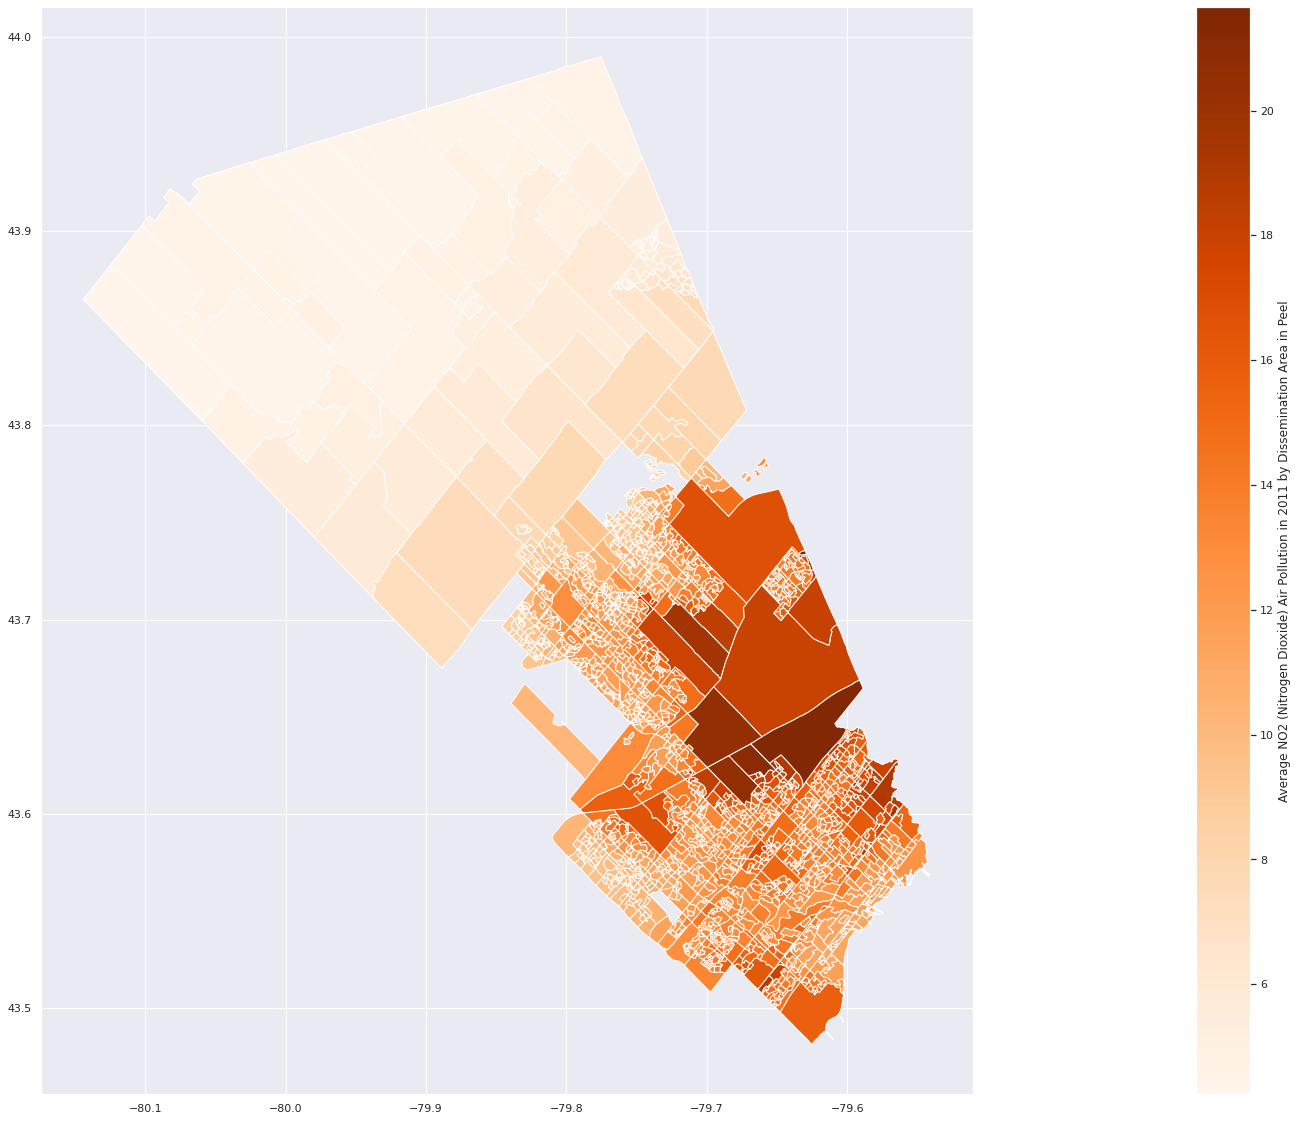

In [16]:
# Chloropleth Map of NO2 Air Pollution in 2011 for Peel Region
peel_no2_2011_df.plot(column = "APMean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) Air Pollution in 2011 by Dissemination Area in Peel"},
                      cmap = "Oranges");

In [17]:
# Import 2006 NO2 Data
no2_2006_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_06.csv')
no2_2011_data_df.head(10)

# Drop the useless geometry column
no2_2006_data_df = no2_2006_data_df.drop('geometry', axis = 1)
no2_2006_data_df.head(5)

DAUID   CSDUID   CCSUID  CDUID  ERUID  PRUID       CTUID  CMAUID  \
0  35210001  3521024  3521024   3521   3530     35  5350585.08     535   
1  35210002  3521024  3521024   3521   3530     35  5350585.08     535   
2  35210003  3521024  3521024   3521   3530     35  5350585.08     535   
3  35210004  3521024  3521024   3521   3530     35  5350585.08     535   
4  35210011  3521024  3521024   3521   3530     35  5350586.01     535   

     APMean  
0  6.999896  
1  6.747858  
2  6.607805  
3  7.631021  
4  7.847581

In [18]:
# Merge Peel Boundary Files to 2006 NO2 Air Pollution
peel_no2_2006_df = peel_da_boundaries.merge(no2_2006_data_df, on = 'DAUID')
peel_no2_2006_df

OBJECTID     DAUID PRUID_x   PRNAME CDUID_x CDNAME CDTYPE CCSUID_x  \
0         4055  35211603      35  Ontario    3521   Peel     RM  3521024   
1         4067  35211604      35  Ontario    3521   Peel     RM  3521024   
2         4092  35210014      35  Ontario    3521   Peel     RM  3521024   
3         4093  35210015      35  Ontario    3521   Peel     RM  3521024   
4         4094  35210017      35  Ontario    3521   Peel     RM  3521024   
...        ...       ...     ...      ...     ...    ...    ...      ...   
1358      8841  35211440      35  Ontario    3521   Peel     RM  3521010   
1359      8842  35211442      35  Ontario    3521   Peel     RM  3521010   
1360      8843  35211443      35  Ontario    3521   Peel     RM  3521010   
1361      8844  35211505      35  Ontario    3521   Peel     RM  3521010   
1362      8845  35211506      35  Ontario    3521   Peel     RM  3521010   

       CCSNAME CSDUID_x  ... SHAPE_Area  \
0      Caledon  3521024  ...   0.001740   
1      Caledon  3521024  ...   0.003098   
2      Caledon  3521024  ...   0.001292   
3      Caledon  3521024  ...   0.001747   
4      Caledon  3521024  ...   0.002237   
...        ...      ...  ...        ...   
1358  Brampton  3521005  ...   0.000029   
1359  Brampton  3521005  ...   0.000014   
1360  Brampton  3521005  ...   0.000014   
1361  Brampton  3521005  ...   0.000005   
1362  Brampton  3521005  ...   0.000027   

                                               geometry CSDUID_y CCSUID_y  \
0     MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...  3521024  3521024   
1     MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...  3521024  3521024   
2     MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...  3521024  3521024   
3     MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...  3521024  3521024   
4     MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...  3521024  3521024   
...                                                 ...      ...      ...   
1358  MULTIPOLYGON (((-79.62180 43.59370, -79.62173 ...  3521005  3521005   
1359  MULTIPOLYGON (((-79.60906 43.57673, -79.61012 ...  3521005  3521005   
1360  MULTIPOLYGON (((-79.61053 43.57150, -79.61057 ...  3521005  3521005   
1361  MULTIPOLYGON (((-79.59389 43.60765, -79.59397 ...  3521005  3521005   
1362  MULTIPOLYGON (((-79.59474 43.60811, -79.59397 ...  3521005  3521005   

     CDUID_y ERUID_y PRUID_y     CTUID_y CMAUID_y     APMean  
0       3521    3530      35  5350585.07      535   6.710840  
1       3521    3530      35  5350585.07      535   6.550836  
2       3521    3530      35  5350586.01      535   8.445314  
3       3521    3530      35  5350586.02      535   8.510772  
4       3521    3530      35  5350586.02      535   8.550670  
...      ...     ...     ...         ...      ...        ...  
1358    3521    3530      35  5350521.03      535  19.964281  
1359    3521    3530      35  5350512.00      535  20.837202  
1360    3521    3530      35  5350513.03      535  20.974375  
1361    3521    3530      35  5350524.01      535  24.948547  
1362    3521    3530      35  5350524.01      535  25.538477  

[1363 rows x 322 columns]

In [19]:
# Ensure that geometry is retained with 2006 NO2 Data
peel_no2_2011_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1605    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1606    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1607    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1608    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1609    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1610, dtype: geometry

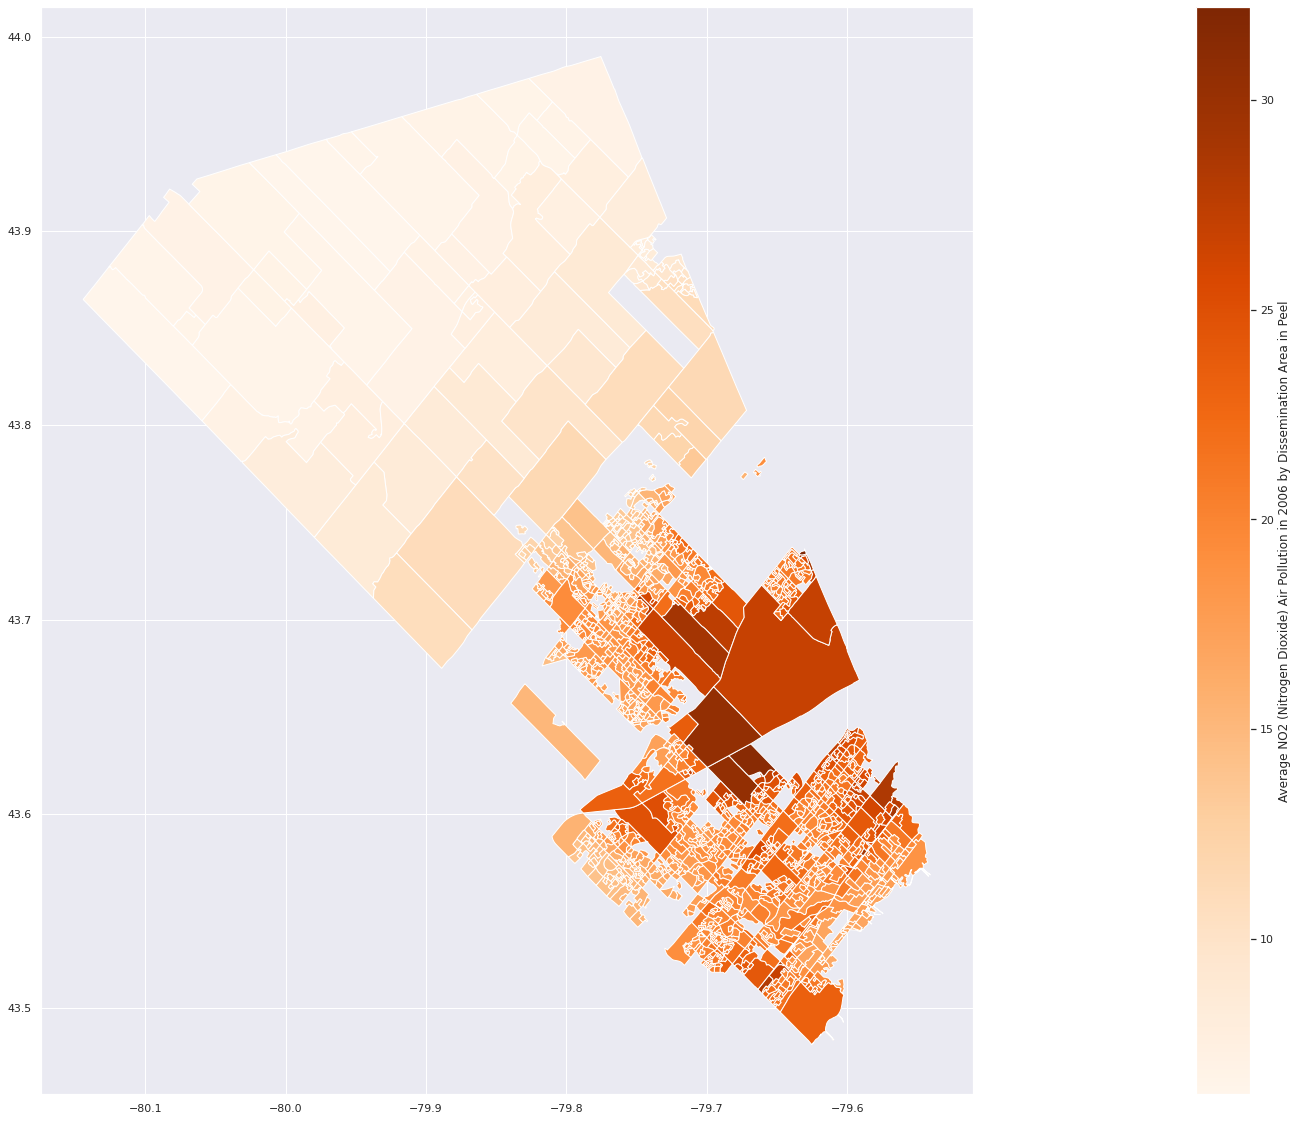

In [20]:
# Chloropleth Map of NO2 Air Pollution in 2006 for Peel Region
peel_no2_2006_df.plot(column = "APMean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) Air Pollution in 2006 by Dissemination Area in Peel"},
                      cmap = "Oranges");

In [159]:
# Project data to WGS 84 - meters
peel_no2_2016_df = peel_no2_2016_df.to_crs(32619)
peel_no2_2011_df = peel_no2_2011_df.to_crs(32619)
peel_no2_2006_df = peel_no2_2006_df.to_crs(32619)

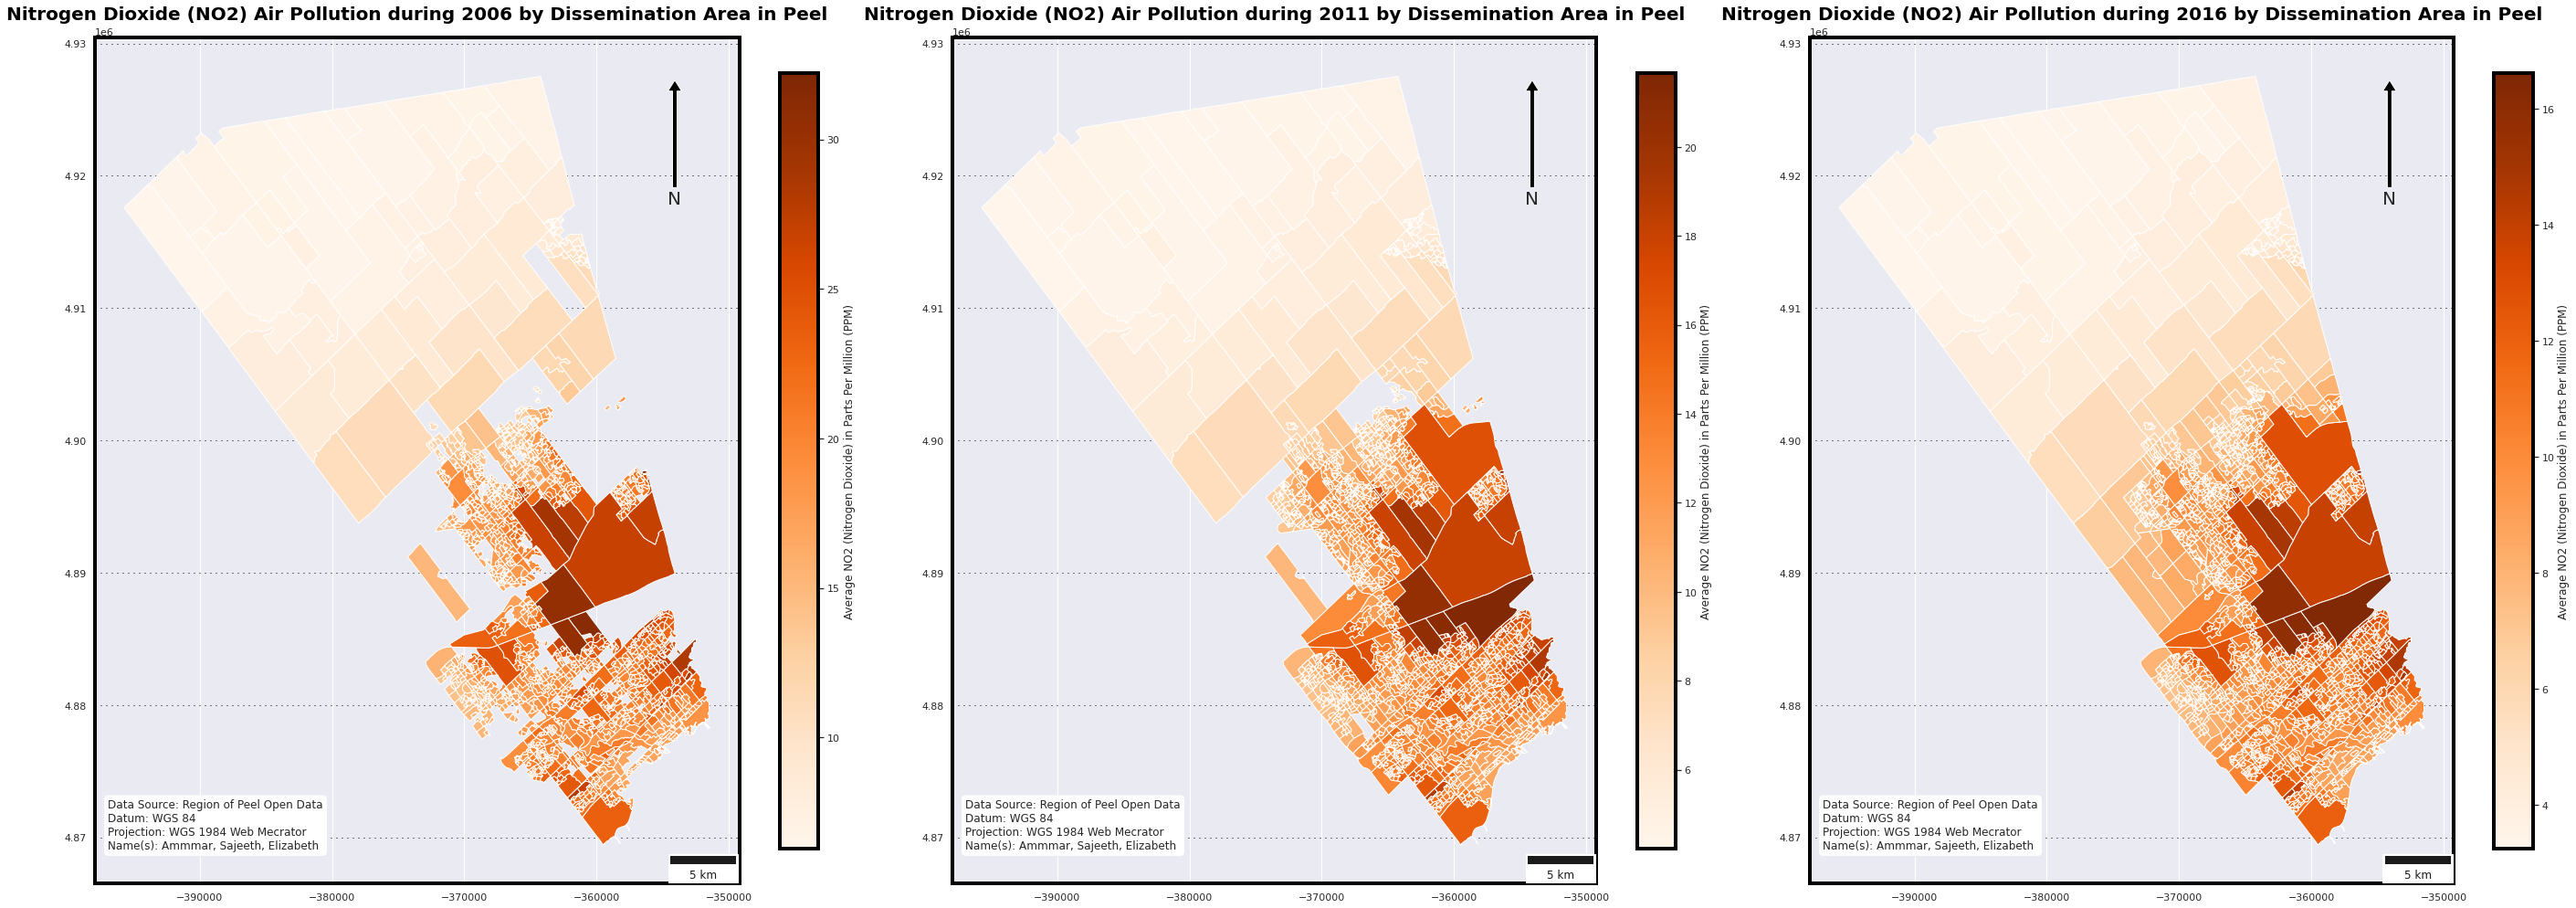

In [198]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                      ncols=3,
                                      figsize=(40, 20));

x, y, arrow_length = 0.9, 0.95, 0.14

mapinfo = f'''Data Source: Region of Peel Open Data
Datum: WGS 84
Projection: WGS 1984 Web Mecrator
Name(s): Ammmar, Sajeeth, Elizabeth'''

mapbox = dict(boxstyle='round', facecolor='white', alpha=1.0)

# Chloropleth Map of NO2 Air Pollution in 2006 for Peel Region
peel_no2_2006_df.plot(ax = ax0,
                      column = "APMean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) in Parts Per Million (PPM)", 'shrink': 0.6},
                      cmap = "Oranges")
ax0.set_title('Nitrogen Dioxide (NO2) Air Pollution during 2006 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_xlabel("")
ax0.set_ylabel("");
ax0.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax0.transAxes)
ax0.add_artist(ScaleBar(1, location = 'lower right'))
ax0.text(0.02, 0.10, mapinfo, transform=ax0.transAxes, va='top', bbox= mapbox)

# Chloropleth Map of NO2 Air Pollution in 2011 for Peel Region
peel_no2_2011_df.plot(ax = ax1,
                      column = "APMean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) in Parts Per Million (PPM)", 'shrink': 0.6},
                      cmap = "Oranges")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Nitrogen Dioxide (NO2) Air Pollution during 2011 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax1.set_xlabel("")
ax1.set_ylabel("");
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)
ax1.add_artist(ScaleBar(1, location = 'lower right'))
ax1.text(0.02, 0.10, mapinfo, transform=ax1.transAxes, va='top', bbox= mapbox)

# Chloropleth Map of NO2 Air Pollution in 2016 for Peel Region
peel_no2_2016_df.plot(ax = ax2,
                      column = "APMean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) in Parts Per Million (PPM)", 'shrink': 0.6},
                      cmap = "Oranges")
ax2.set_title('Nitrogen Dioxide (NO2) Air Pollution during 2016 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax2.transAxes)
ax2.add_artist(ScaleBar(1, location = 'lower right'))
ax2.text(0.02, 0.10, mapinfo, transform=ax2.transAxes, va='top', bbox= mapbox);

# **NDVI Data Collection**

Collecting NDVI Data at the Dissemination Level for Peel Region using Google Earth Engine and MODIS Satelite Imagery, 

References: 


*   Computing mean for each Peel DA (NDVI band included in MODIS): https://knowyourspace.dk/2020/12/20/mean_ndvi_per_polygon_gee/
*   Computing NDVI:https://igis.ucanr.edu/Tech_Notes/EarthEngine_NDVI/
*   Mitchell's GGR 437 Course
*   Data conversion in Python GEE: https://stackoverflow.com/questions/50912548/how-to-export-results-using-python-in-google-earth-engine 







In [ ]:
# Create Basemap
Map = geemap.Map() # Authentication Token will be needed so follow the URL here (allow access to EVERYTHING)
Map

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=9erAqoxW_itlGWEXzYX__WPjHozp2dfz_fP5hhfvZqk&tc=xtp-v5TcDS_7havzNvRIOD0D0F_QRcOz0vuDUw7iCeg&cc=9EvUzGegr1KUGx_oP2N_4Q7yLVvCzLHnOyZrrdqaQ6A

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJoY9YCh4LpTAXQTU9RkSZkPBs0vZmideVAUPx2wSmsMW2ttufb_y1o

Successfully saved authorization token.


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# Peel 2016 Dissemination Blocks
peel_2016_boundaries = ee.FeatureCollection('users/ammarsidhu/PeelDA')

# Create Empty Image
empty = ee.Image().byte() 

# Outline the Peel Boundary with Empty Image
outline = empty.paint(peel_2016_boundaries, 1, 3)

# Add Boundary to Map
Map.addLayer(outline, {}, "Peel Region 2016 Dissemination Areas")
Map

Map(bottom=95892.0, center=[43.731414013769, -78.97386138555069], controls=(WidgetControl(options=['position',…

In [ ]:
# Load Sentinel ImageCollection
modis = ee.ImageCollection("MODIS/006/MOD13Q1"); #  Sentinel-2 Surface reflectance

In [ ]:
# Filtering Dates
startDate = '2016-06-10'
endDate = '2016-09-10'

In [ ]:
# MODIS has NDVI but we need to correct it's scale
def modisNDVIrescaler(image):
  return image.expression('float(b("NDVI")/1000)')

In [ ]:
# Filter MODIS imagery to 2016 peel DA boundaries during peak summer dates
modis_peel_2016_peak_summer = modis.filterBounds(peel_2016_boundaries).filterDate(startDate, endDate)

In [ ]:
# Select NDVI Band from MODIS 
modis_NDVI_peel_2016 = modis_peel_2016_peak_summer.map(modisNDVIrescaler)
print('MODIS after NDVI rescaling', modis_peel_2016_peak_summer)

MODIS after NDVI rescaling ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "MODIS/006/MOD13Q1"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.intersects",
                "arguments": {
                  "leftField": {
                    "constantValue": ".all"
                  },
                  "rightValue": {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
  

In [ ]:
mosaicing = modis_NDVI_peel_2016.mosaic().clip(peel_2016_boundaries)
print('Mosaic', mosaicing)

Mosaic ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.clip",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "Collection.loadTable",
          "arguments": {
            "tableId": {
              "constantValue": "users/ammarsidhu/PeelDA"
            }
          }
        }
      },
      "input": {
        "functionInvocationValue": {
          "functionName": "ImageCollection.mosaic",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.map",
                "arguments": {
                  "baseAlgorithm": {
                    "functionDefinitionValue": {
                      "argumentNames": [
                        "_MAPPING_VAR_0_0"
                      ],
                      "body": {
                        "functionInvocationValue": {
                          "functionReference": {
                           

In [ ]:
# NDVI Colour Palette
ndviColours = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901', '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01', '012E01', '011D01', '011301']

# Add NDVI Band as layer
Map.addLayer(mosaicing, {'min': 0, 'max': 1, 'palette': ndviColours,}, 'Mosaic NDVI')

# View Map
Map

Map(bottom=95892.0, center=[43.731414013769, -78.97386138555069], controls=(WidgetControl(options=['position',…

In [ ]:
# Reduce imagery to peel 2016 DA boundaries
mean_2016ndvi_boundaries = mosaicing.reduceRegions(collection = peel_2016_boundaries, reducer = ee.Reducer.mean(), scale = 250)

In [ ]:
# Export mean NDVI per DA boundary as CSV
ndvi_2016_data_csv = ee.batch.Export.table.toDrive(collection = mean_2016ndvi_boundaries, folder = 'GGR442_Project3_Data', description = 'peel_ndvi_2016', fileFormat = 'CSV')
ee.batch.data.startProcessing(ndvi_2016_data_csv.id, ndvi_2016_data_csv.config)

In [23]:
# Import 2016 NDVI Data
ndvi_2016_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/modis250_ndvi_Peel_20161_2016.csv')
ndvi_2016_data_df.head(5)

system:index    ADAUID   CCSNAME   CCSUID CDNAME CDTYPE  CDUID  \
0  000000000000000002fd  35210072  Brampton  3521010   Peel     RM   3521   
1  00000000000000000648  35210061  Brampton  3521010   Peel     RM   3521   
2  00000000000000000501  35210105  Brampton  3521010   Peel     RM   3521   
3  000000000000000002c5  35210071  Brampton  3521010   Peel     RM   3521   
4  00000000000000000112  35210022  Brampton  3521010   Peel     RM   3521   

   CMANAME  CMAPUID CMATYPE  ...  ERUID OBJECTID   PRNAME  PRUID  SACCODE  \
0  Toronto    35535       B  ...   3530     6590  Ontario     35      535   
1  Toronto    35535       B  ...   3530     8810  Ontario     35      535   
2  Toronto    35535       B  ...   3530     7565  Ontario     35      535   
3  Toronto    35535       B  ...   3530     6484  Ontario     35      535   
4  Toronto    35535       B  ...   3530     6043  Ontario     35      535   

   SACTYPE    SHAPE_Area    SHAPE_Leng      mean  \
0        1 -1.305361e+06   5346.305941  0.493255   
1        1 -2.666023e+07  27683.298821  0.304487   
2        1 -1.045216e+06   5171.342938  0.321286   
3        1 -8.182174e+05   3586.517864  0.301581   
4        1 -2.699952e+05   3585.228070  0.379673   

                                     .geo  
0  {"type":"MultiPoint","coordinates":[]}  
1  {"type":"MultiPoint","coordinates":[]}  
2  {"type":"MultiPoint","coordinates":[]}  
3  {"type":"MultiPoint","coordinates":[]}  
4  {"type":"MultiPoint","coordinates":[]}  

[5 rows x 31 columns]

In [24]:
# Merge Peel Boundary Files to 2016 NDVI 
peel_ndvi_2016_df = peel_da_boundaries.merge(ndvi_2016_data_df, on = 'DAUID')
peel_ndvi_2016_df

OBJECTID_x     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x  \
0           4055  35211603      35  Ontario    3521     Peel       RM   
1           4067  35211604      35  Ontario    3521     Peel       RM   
2           4092  35210014      35  Ontario    3521     Peel       RM   
3           4093  35210015      35  Ontario    3521     Peel       RM   
4           4094  35210017      35  Ontario    3521     Peel       RM   
...          ...       ...     ...      ...     ...      ...      ...   
1645        8854  35212107      35  Ontario    3521     Peel       RM   
1646        8855  35212118      35  Ontario    3521     Peel       RM   
1647        8856  35212119      35  Ontario    3521     Peel       RM   
1648        8869  35212082      35  Ontario    3521     Peel       RM   
1649        8870  35212083      35  Ontario    3521     Peel       RM   

     CCSUID_x CCSNAME_x CSDUID_x  ... ERUID_y OBJECTID_y PRNAME_y PRUID_y  \
0     3521024   Caledon  3521024  ...    3530       4055  Ontario      35   
1     3521024   Caledon  3521024  ...    3530       4067  Ontario      35   
2     3521024   Caledon  3521024  ...    3530       4092  Ontario      35   
3     3521024   Caledon  3521024  ...    3530       4093  Ontario      35   
4     3521024   Caledon  3521024  ...    3530       4094  Ontario      35   
...       ...       ...      ...  ...     ...        ...      ...     ...   
1645  3521010  Brampton  3521005  ...    3530       8854  Ontario      35   
1646  3521010  Brampton  3521005  ...    3530       8855  Ontario      35   
1647  3521010  Brampton  3521005  ...    3530       8856  Ontario      35   
1648  3521010  Brampton  3521005  ...    3530       8869  Ontario      35   
1649  3521010  Brampton  3521005  ...    3530       8870  Ontario      35   

     SACCODE_y SACTYPE_y  SHAPE_Area_y    SHAPE_Leng      mean  \
0          535         1 -2.995463e+07  25568.578902  0.812255   
1          535         1 -5.331006e+07  32170.972280  0.834277   
2          535         1 -2.217722e+07  19780.911767  0.706434   
3          535         1 -2.997819e+07  22667.200689  0.713679   
4          535         1 -3.837932e+07  27984.249081  0.808633   
...        ...       ...           ...           ...       ...   
1645       535         1 -2.127970e+06  10819.540553  0.731943   
1646       535         1 -1.610293e+06   6492.035172  0.400781   
1647       535         1 -1.486938e+06   8951.481010  0.373722   
1648       535         1 -6.159696e+04   1354.618399  0.463004   
1649       535         1 -1.702470e+05   2054.791420  0.431273   

                                        .geo  
0     {"type":"MultiPoint","coordinates":[]}  
1     {"type":"MultiPoint","coordinates":[]}  
2     {"type":"MultiPoint","coordinates":[]}  
3     {"type":"MultiPoint","coordinates":[]}  
4     {"type":"MultiPoint","coordinates":[]}  
...                                      ...  
1645  {"type":"MultiPoint","coordinates":[]}  
1646  {"type":"MultiPoint","coordinates":[]}  
1647  {"type":"MultiPoint","coordinates":[]}  
1648  {"type":"MultiPoint","coordinates":[]}  
1649  {"type":"MultiPoint","coordinates":[]}  

[1650 rows x 344 columns]

In [25]:
# Ensure that geometry is retained with 2016 NO2 Data
peel_ndvi_2016_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

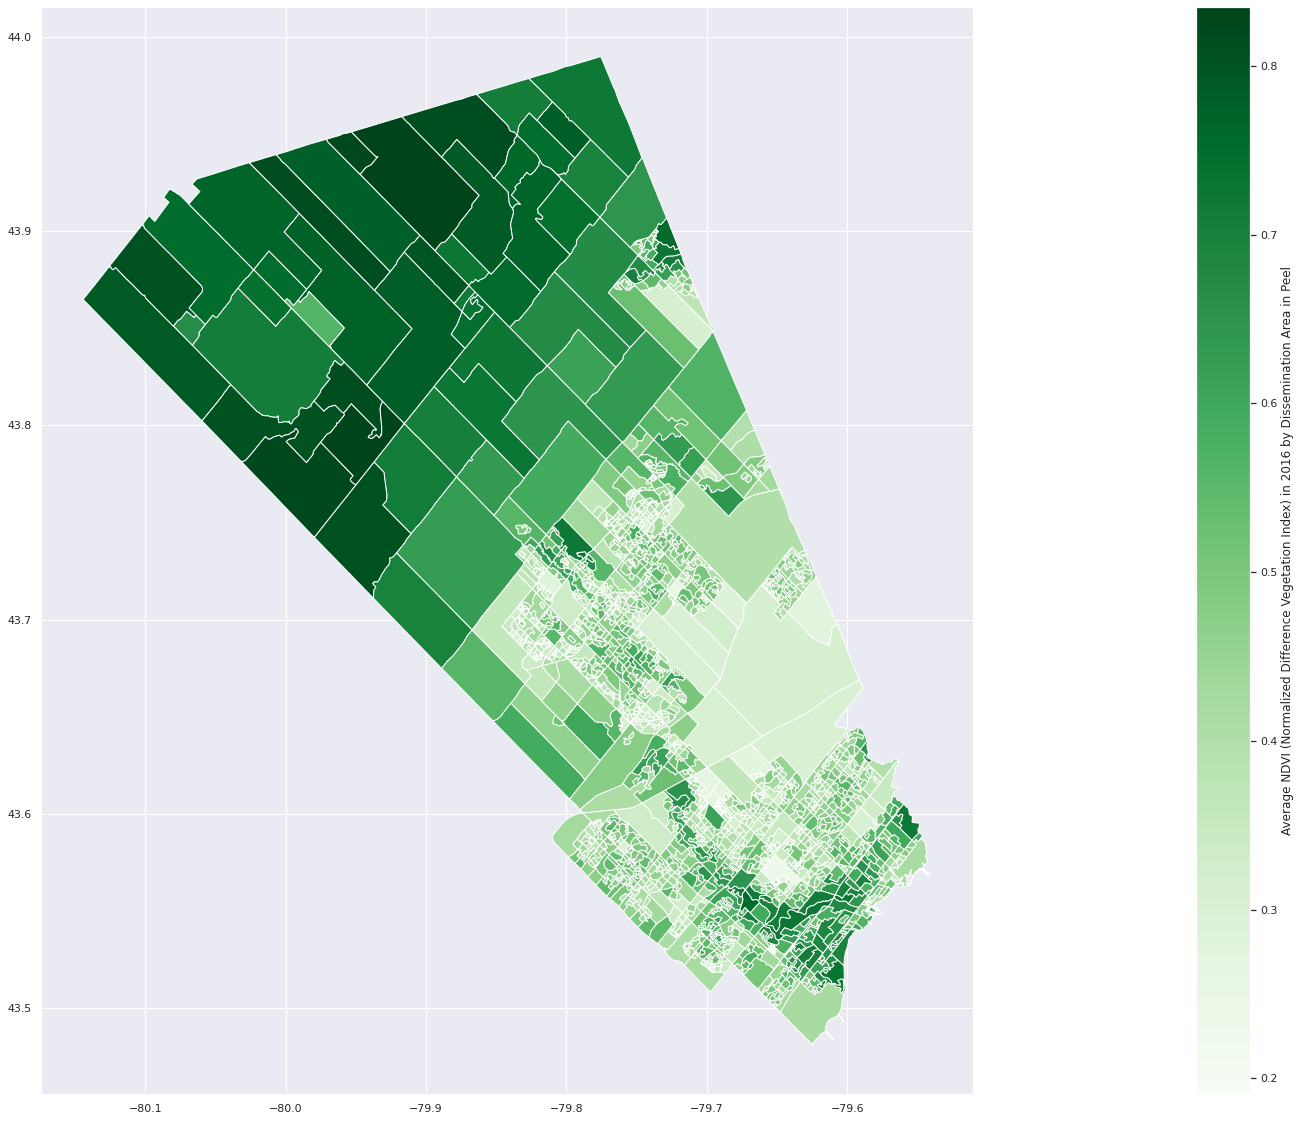

In [26]:
# Chloropleth Map of NDVI in 2006 for Peel Region
peel_ndvi_2016_df.plot(column = "mean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index) in 2016 by Dissemination Area in Peel"},
                      cmap = "Greens");

In [115]:
# Import 2006 NDVI Data
ndvi_2006_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/modis250_ndvi_Peel_20061_2006.csv')
ndvi_2006_data_df.head(5)

system:index    ADAUID   CCSNAME   CCSUID CDNAME CDTYPE  CDUID  \
0  000000000000000002fd  35210072  Brampton  3521010   Peel     RM   3521   
1  00000000000000000648  35210061  Brampton  3521010   Peel     RM   3521   
2  00000000000000000501  35210105  Brampton  3521010   Peel     RM   3521   
3  000000000000000002c5  35210071  Brampton  3521010   Peel     RM   3521   
4  00000000000000000112  35210022  Brampton  3521010   Peel     RM   3521   

   CMANAME  CMAPUID CMATYPE  ...  ERUID OBJECTID   PRNAME  PRUID  SACCODE  \
0  Toronto    35535       B  ...   3530     6590  Ontario     35      535   
1  Toronto    35535       B  ...   3530     8810  Ontario     35      535   
2  Toronto    35535       B  ...   3530     7565  Ontario     35      535   
3  Toronto    35535       B  ...   3530     6484  Ontario     35      535   
4  Toronto    35535       B  ...   3530     6043  Ontario     35      535   

   SACTYPE    SHAPE_Area    SHAPE_Leng      mean  \
0        1 -1.305361e+06   5346.305941  0.551834   
1        1 -2.666023e+07  27683.298821  0.311012   
2        1 -1.045216e+06   5171.342938  0.342896   
3        1 -8.182174e+05   3586.517864  0.304150   
4        1 -2.699952e+05   3585.228070  0.360847   

                                     .geo  
0  {"type":"MultiPoint","coordinates":[]}  
1  {"type":"MultiPoint","coordinates":[]}  
2  {"type":"MultiPoint","coordinates":[]}  
3  {"type":"MultiPoint","coordinates":[]}  
4  {"type":"MultiPoint","coordinates":[]}  

[5 rows x 31 columns]

In [116]:
# Merge Peel Boundary Files to 2006 NDVI
peel_ndvi_2006_df = peel_da_boundaries.merge(ndvi_2006_data_df, on = 'DAUID')
peel_ndvi_2006_df

OBJECTID_x     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x  \
0           4055  35211603      35  Ontario    3521     Peel       RM   
1           4067  35211604      35  Ontario    3521     Peel       RM   
2           4092  35210014      35  Ontario    3521     Peel       RM   
3           4093  35210015      35  Ontario    3521     Peel       RM   
4           4094  35210017      35  Ontario    3521     Peel       RM   
...          ...       ...     ...      ...     ...      ...      ...   
1645        8854  35212107      35  Ontario    3521     Peel       RM   
1646        8855  35212118      35  Ontario    3521     Peel       RM   
1647        8856  35212119      35  Ontario    3521     Peel       RM   
1648        8869  35212082      35  Ontario    3521     Peel       RM   
1649        8870  35212083      35  Ontario    3521     Peel       RM   

     CCSUID_x CCSNAME_x CSDUID_x  ... ERUID_y OBJECTID_y PRNAME_y PRUID_y  \
0     3521024   Caledon  3521024  ...    3530       4055  Ontario      35   
1     3521024   Caledon  3521024  ...    3530       4067  Ontario      35   
2     3521024   Caledon  3521024  ...    3530       4092  Ontario      35   
3     3521024   Caledon  3521024  ...    3530       4093  Ontario      35   
4     3521024   Caledon  3521024  ...    3530       4094  Ontario      35   
...       ...       ...      ...  ...     ...        ...      ...     ...   
1645  3521010  Brampton  3521005  ...    3530       8854  Ontario      35   
1646  3521010  Brampton  3521005  ...    3530       8855  Ontario      35   
1647  3521010  Brampton  3521005  ...    3530       8856  Ontario      35   
1648  3521010  Brampton  3521005  ...    3530       8869  Ontario      35   
1649  3521010  Brampton  3521005  ...    3530       8870  Ontario      35   

     SACCODE_y SACTYPE_y  SHAPE_Area_y    SHAPE_Leng      mean  \
0          535         1 -2.995463e+07  25568.578902  0.760546   
1          535         1 -5.331006e+07  32170.972280  0.778237   
2          535         1 -2.217722e+07  19780.911767  0.695397   
3          535         1 -2.997819e+07  22667.200689  0.721153   
4          535         1 -3.837932e+07  27984.249081  0.793586   
...        ...       ...           ...           ...       ...   
1645       535         1 -2.127970e+06  10819.540553  0.727726   
1646       535         1 -1.610293e+06   6492.035172  0.426064   
1647       535         1 -1.486938e+06   8951.481010  0.384483   
1648       535         1 -6.159696e+04   1354.618399  0.521988   
1649       535         1 -1.702470e+05   2054.791420  0.496718   

                                        .geo  
0     {"type":"MultiPoint","coordinates":[]}  
1     {"type":"MultiPoint","coordinates":[]}  
2     {"type":"MultiPoint","coordinates":[]}  
3     {"type":"MultiPoint","coordinates":[]}  
4     {"type":"MultiPoint","coordinates":[]}  
...                                      ...  
1645  {"type":"MultiPoint","coordinates":[]}  
1646  {"type":"MultiPoint","coordinates":[]}  
1647  {"type":"MultiPoint","coordinates":[]}  
1648  {"type":"MultiPoint","coordinates":[]}  
1649  {"type":"MultiPoint","coordinates":[]}  

[1650 rows x 344 columns]

In [117]:
# Ensure that geometry is retained with 2006 NDVI Data
peel_ndvi_2006_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

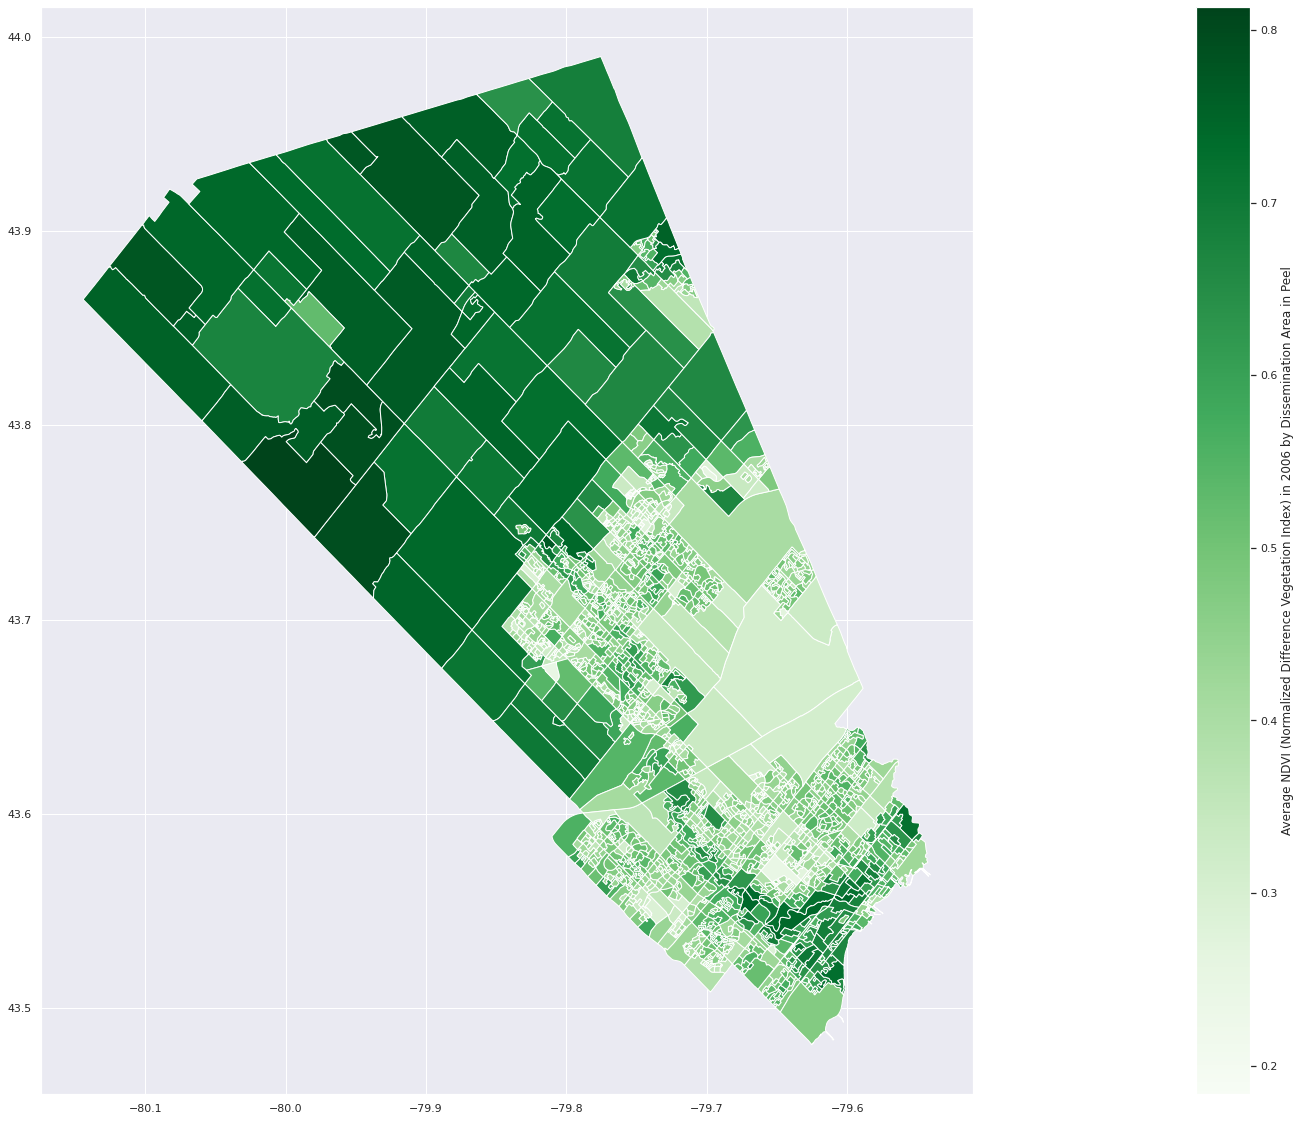

In [118]:
# Chloropleth Map of NDVI in 2006 for Peel Region
peel_ndvi_2006_df.plot(column = "mean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index) in 2006 by Dissemination Area in Peel"},
                      cmap = "Greens");

In [125]:
# Import 2011 NDVI Data
ndvi_2011_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/modis250_ndvi_Peel_20111_2011.csv')
ndvi_2011_data_df.head(5)

system:index    ADAUID   CCSNAME   CCSUID CDNAME CDTYPE  CDUID  \
0  000000000000000002fd  35210072  Brampton  3521010   Peel     RM   3521   
1  00000000000000000648  35210061  Brampton  3521010   Peel     RM   3521   
2  00000000000000000501  35210105  Brampton  3521010   Peel     RM   3521   
3  000000000000000002c5  35210071  Brampton  3521010   Peel     RM   3521   
4  00000000000000000112  35210022  Brampton  3521010   Peel     RM   3521   

   CMANAME  CMAPUID CMATYPE  ...  ERUID OBJECTID   PRNAME  PRUID  SACCODE  \
0  Toronto    35535       B  ...   3530     6590  Ontario     35      535   
1  Toronto    35535       B  ...   3530     8810  Ontario     35      535   
2  Toronto    35535       B  ...   3530     7565  Ontario     35      535   
3  Toronto    35535       B  ...   3530     6484  Ontario     35      535   
4  Toronto    35535       B  ...   3530     6043  Ontario     35      535   

   SACTYPE    SHAPE_Area    SHAPE_Leng      mean  \
0        1 -1.305361e+06   5346.305941  0.630141   
1        1 -2.666023e+07  27683.298821  0.297467   
2        1 -1.045216e+06   5171.342938  0.349217   
3        1 -8.182174e+05   3586.517864  0.309726   
4        1 -2.699952e+05   3585.228070  0.432910   

                                     .geo  
0  {"type":"MultiPoint","coordinates":[]}  
1  {"type":"MultiPoint","coordinates":[]}  
2  {"type":"MultiPoint","coordinates":[]}  
3  {"type":"MultiPoint","coordinates":[]}  
4  {"type":"MultiPoint","coordinates":[]}  

[5 rows x 31 columns]

In [126]:
# Merge Peel Boundary Files to 2011 NDVI
peel_ndvi_2011_df = peel_da_boundaries.merge(ndvi_2011_data_df, on = 'DAUID')
peel_ndvi_2011_df

OBJECTID_x     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x  \
0           4055  35211603      35  Ontario    3521     Peel       RM   
1           4067  35211604      35  Ontario    3521     Peel       RM   
2           4092  35210014      35  Ontario    3521     Peel       RM   
3           4093  35210015      35  Ontario    3521     Peel       RM   
4           4094  35210017      35  Ontario    3521     Peel       RM   
...          ...       ...     ...      ...     ...      ...      ...   
1645        8854  35212107      35  Ontario    3521     Peel       RM   
1646        8855  35212118      35  Ontario    3521     Peel       RM   
1647        8856  35212119      35  Ontario    3521     Peel       RM   
1648        8869  35212082      35  Ontario    3521     Peel       RM   
1649        8870  35212083      35  Ontario    3521     Peel       RM   

     CCSUID_x CCSNAME_x CSDUID_x  ... ERUID_y OBJECTID_y PRNAME_y PRUID_y  \
0     3521024   Caledon  3521024  ...    3530       4055  Ontario      35   
1     3521024   Caledon  3521024  ...    3530       4067  Ontario      35   
2     3521024   Caledon  3521024  ...    3530       4092  Ontario      35   
3     3521024   Caledon  3521024  ...    3530       4093  Ontario      35   
4     3521024   Caledon  3521024  ...    3530       4094  Ontario      35   
...       ...       ...      ...  ...     ...        ...      ...     ...   
1645  3521010  Brampton  3521005  ...    3530       8854  Ontario      35   
1646  3521010  Brampton  3521005  ...    3530       8855  Ontario      35   
1647  3521010  Brampton  3521005  ...    3530       8856  Ontario      35   
1648  3521010  Brampton  3521005  ...    3530       8869  Ontario      35   
1649  3521010  Brampton  3521005  ...    3530       8870  Ontario      35   

     SACCODE_y SACTYPE_y  SHAPE_Area_y    SHAPE_Leng      mean  \
0          535         1 -2.995463e+07  25568.578902  0.822634   
1          535         1 -5.331006e+07  32170.972280  0.831313   
2          535         1 -2.217722e+07  19780.911767  0.741518   
3          535         1 -2.997819e+07  22667.200689  0.716413   
4          535         1 -3.837932e+07  27984.249081  0.790912   
...        ...       ...           ...           ...       ...   
1645       535         1 -2.127970e+06  10819.540553  0.782663   
1646       535         1 -1.610293e+06   6492.035172  0.459260   
1647       535         1 -1.486938e+06   8951.481010  0.403913   
1648       535         1 -6.159696e+04   1354.618399  0.578294   
1649       535         1 -1.702470e+05   2054.791420  0.536678   

                                        .geo  
0     {"type":"MultiPoint","coordinates":[]}  
1     {"type":"MultiPoint","coordinates":[]}  
2     {"type":"MultiPoint","coordinates":[]}  
3     {"type":"MultiPoint","coordinates":[]}  
4     {"type":"MultiPoint","coordinates":[]}  
...                                      ...  
1645  {"type":"MultiPoint","coordinates":[]}  
1646  {"type":"MultiPoint","coordinates":[]}  
1647  {"type":"MultiPoint","coordinates":[]}  
1648  {"type":"MultiPoint","coordinates":[]}  
1649  {"type":"MultiPoint","coordinates":[]}  

[1650 rows x 344 columns]

In [127]:
# Ensure that geometry is retained with 2006 NDVI Data
peel_ndvi_2011_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

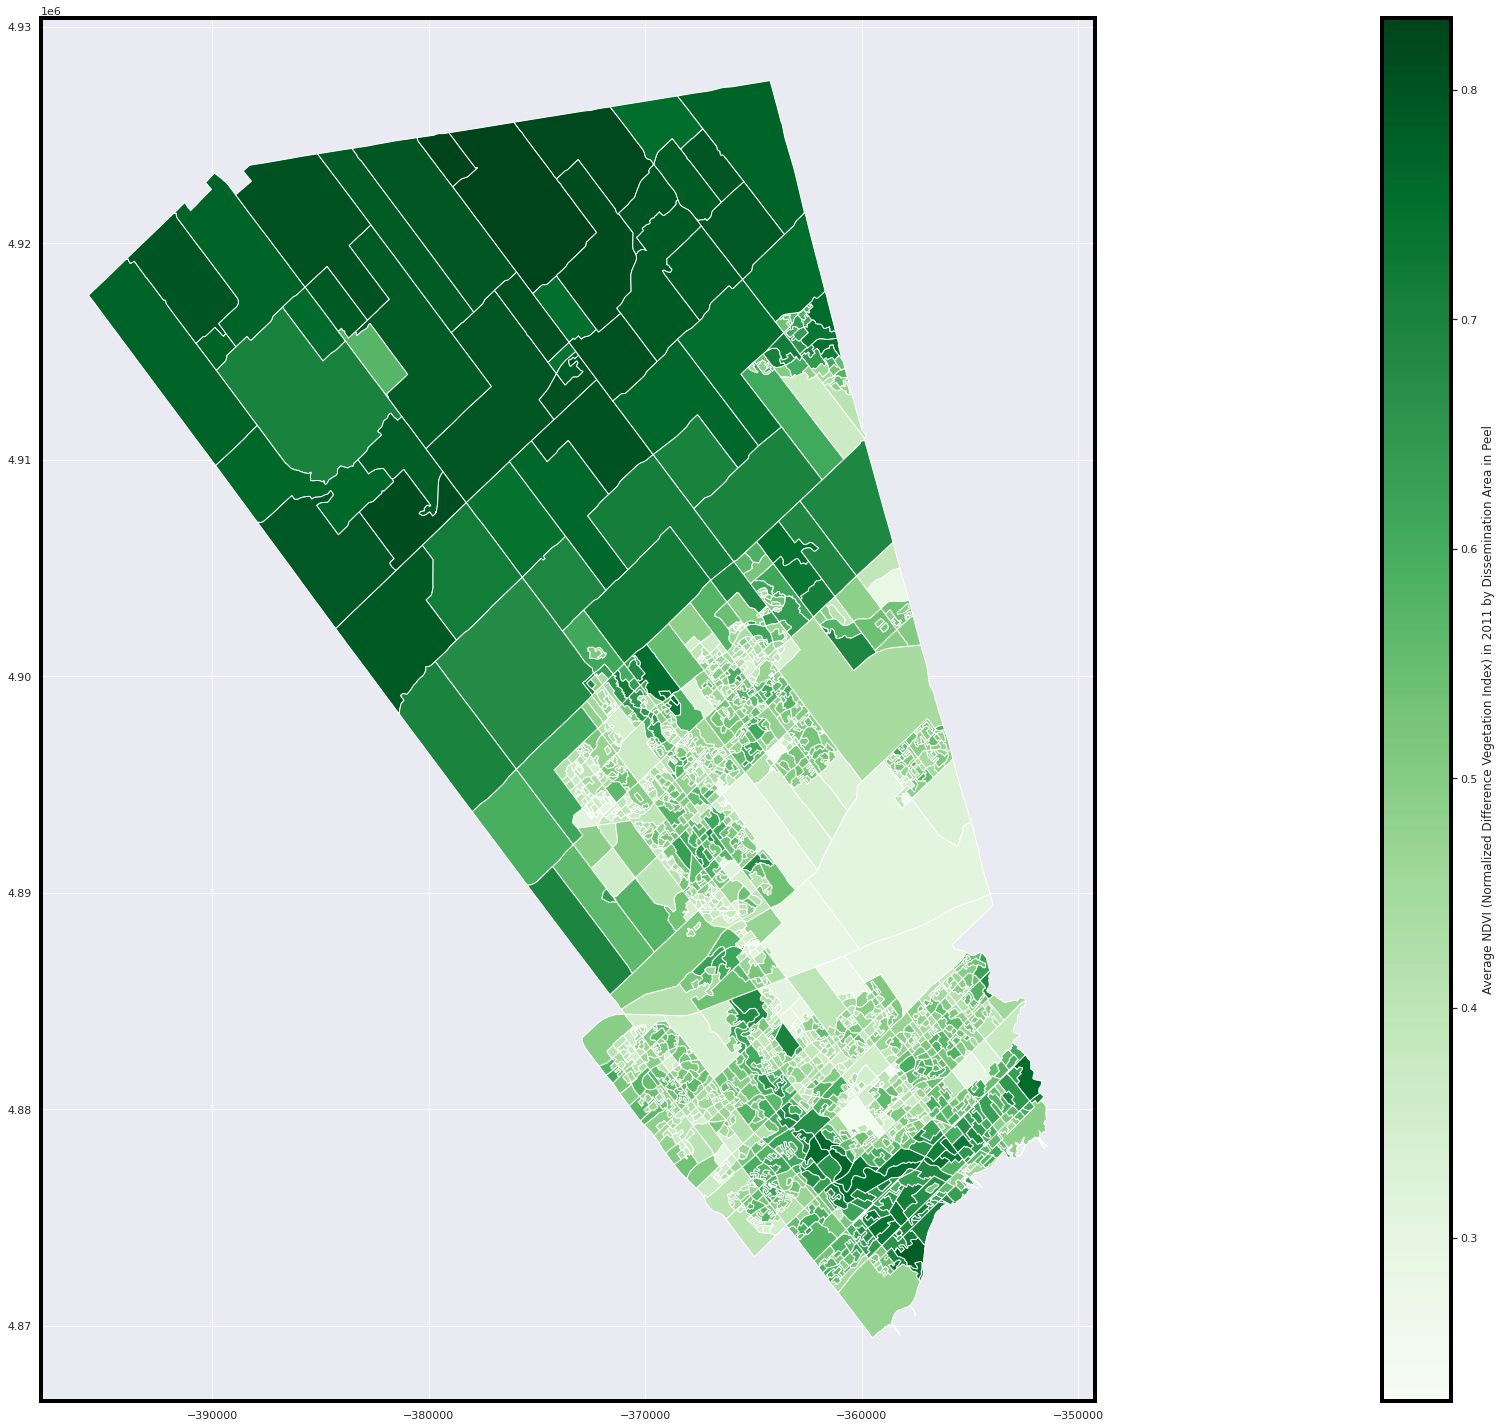

In [201]:
# Chloropleth Map of NDVI in 2006 for Peel Region
peel_ndvi_2011_df.plot(column = "mean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index) in 2011 by Dissemination Area in Peel"},
                      cmap = "Greens");

In [129]:
# Project data to WGS 84 - meters
peel_ndvi_2016_df = peel_ndvi_2016_df.to_crs(32619)
peel_ndvi_2011_df = peel_ndvi_2011_df.to_crs(32619)
peel_ndvi_2006_df = peel_ndvi_2006_df.to_crs(32619)

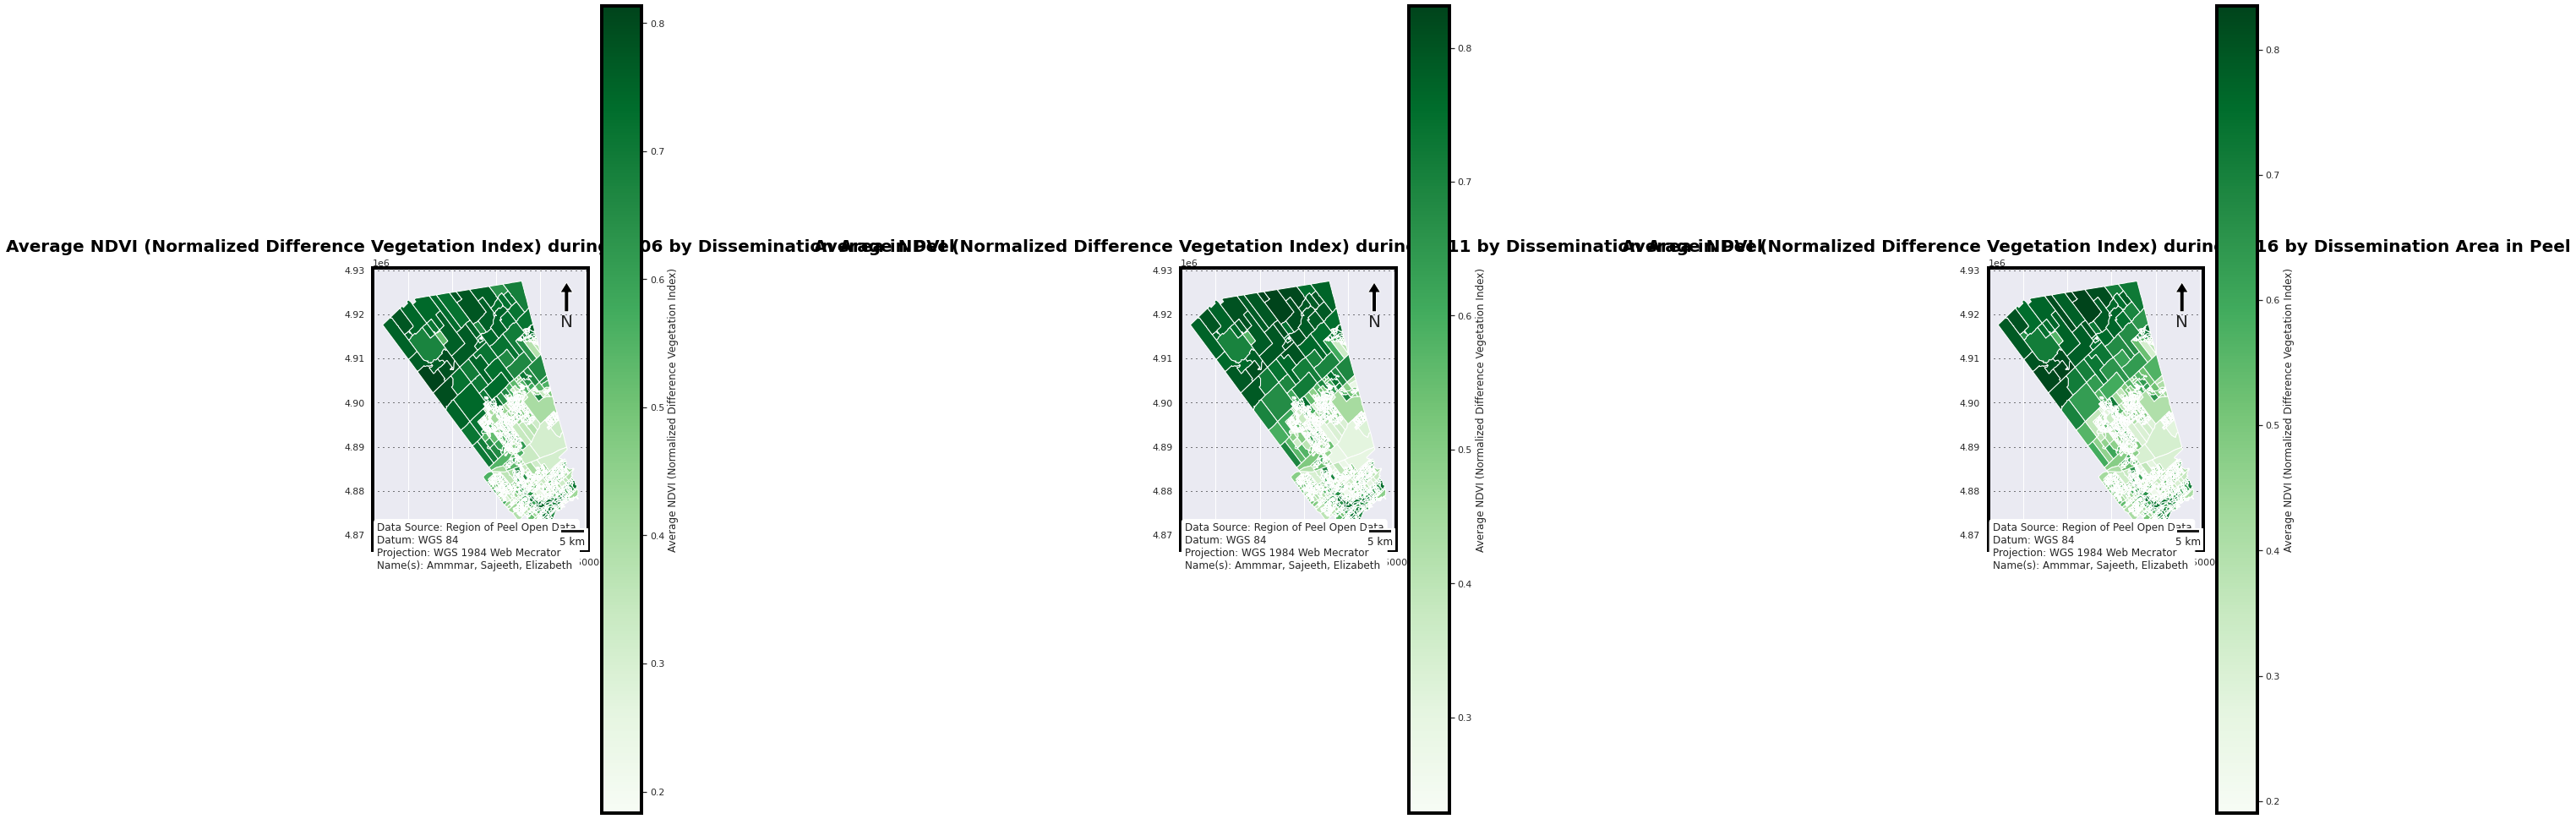

In [200]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                      ncols=3,
                                      figsize=(40, 20));

x, y, arrow_length = 0.9, 0.95, 0.14

mapinfo = f'''Data Source: Region of Peel Open Data
Datum: WGS 84
Projection: WGS 1984 Web Mecrator
Name(s): Ammmar, Sajeeth, Elizabeth'''

mapbox = dict(boxstyle='round', facecolor='white', alpha=1.0)

# Chloropleth Map of NDVI in 2006 for Peel Region
peel_ndvi_2006_df.plot(ax = ax0,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)"},
                      cmap = "Greens")
ax0.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2006 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_xlabel("")
ax0.set_ylabel("");
ax0.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax0.transAxes)
ax0.add_artist(ScaleBar(1, location = 'lower right'))
ax0.text(0.02, 0.10, mapinfo, transform=ax0.transAxes, va='top', bbox= mapbox)


# Chloropleth Map of NDVI in 2011 for Peel Region
peel_ndvi_2011_df.plot(ax = ax1,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)"},
                      cmap = "Greens")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2011 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax1.set_xlabel("")
ax1.set_ylabel("");
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)
ax1.add_artist(ScaleBar(1, location = 'lower right'))
ax1.text(0.02, 0.10, mapinfo, transform=ax1.transAxes, va='top', bbox= mapbox)


# Chloropleth Map of NDVI in 2016 for Peel Region
peel_ndvi_2016_df.plot(ax = ax2,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)"},
                      cmap = "Greens")
ax2.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2016 by Dissemination Area in Peel', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax2.transAxes)
ax2.add_artist(ScaleBar(1, location = 'lower right'));
ax2.text(0.02, 0.10, mapinfo, transform=ax2.transAxes, va='top', bbox= mapbox);

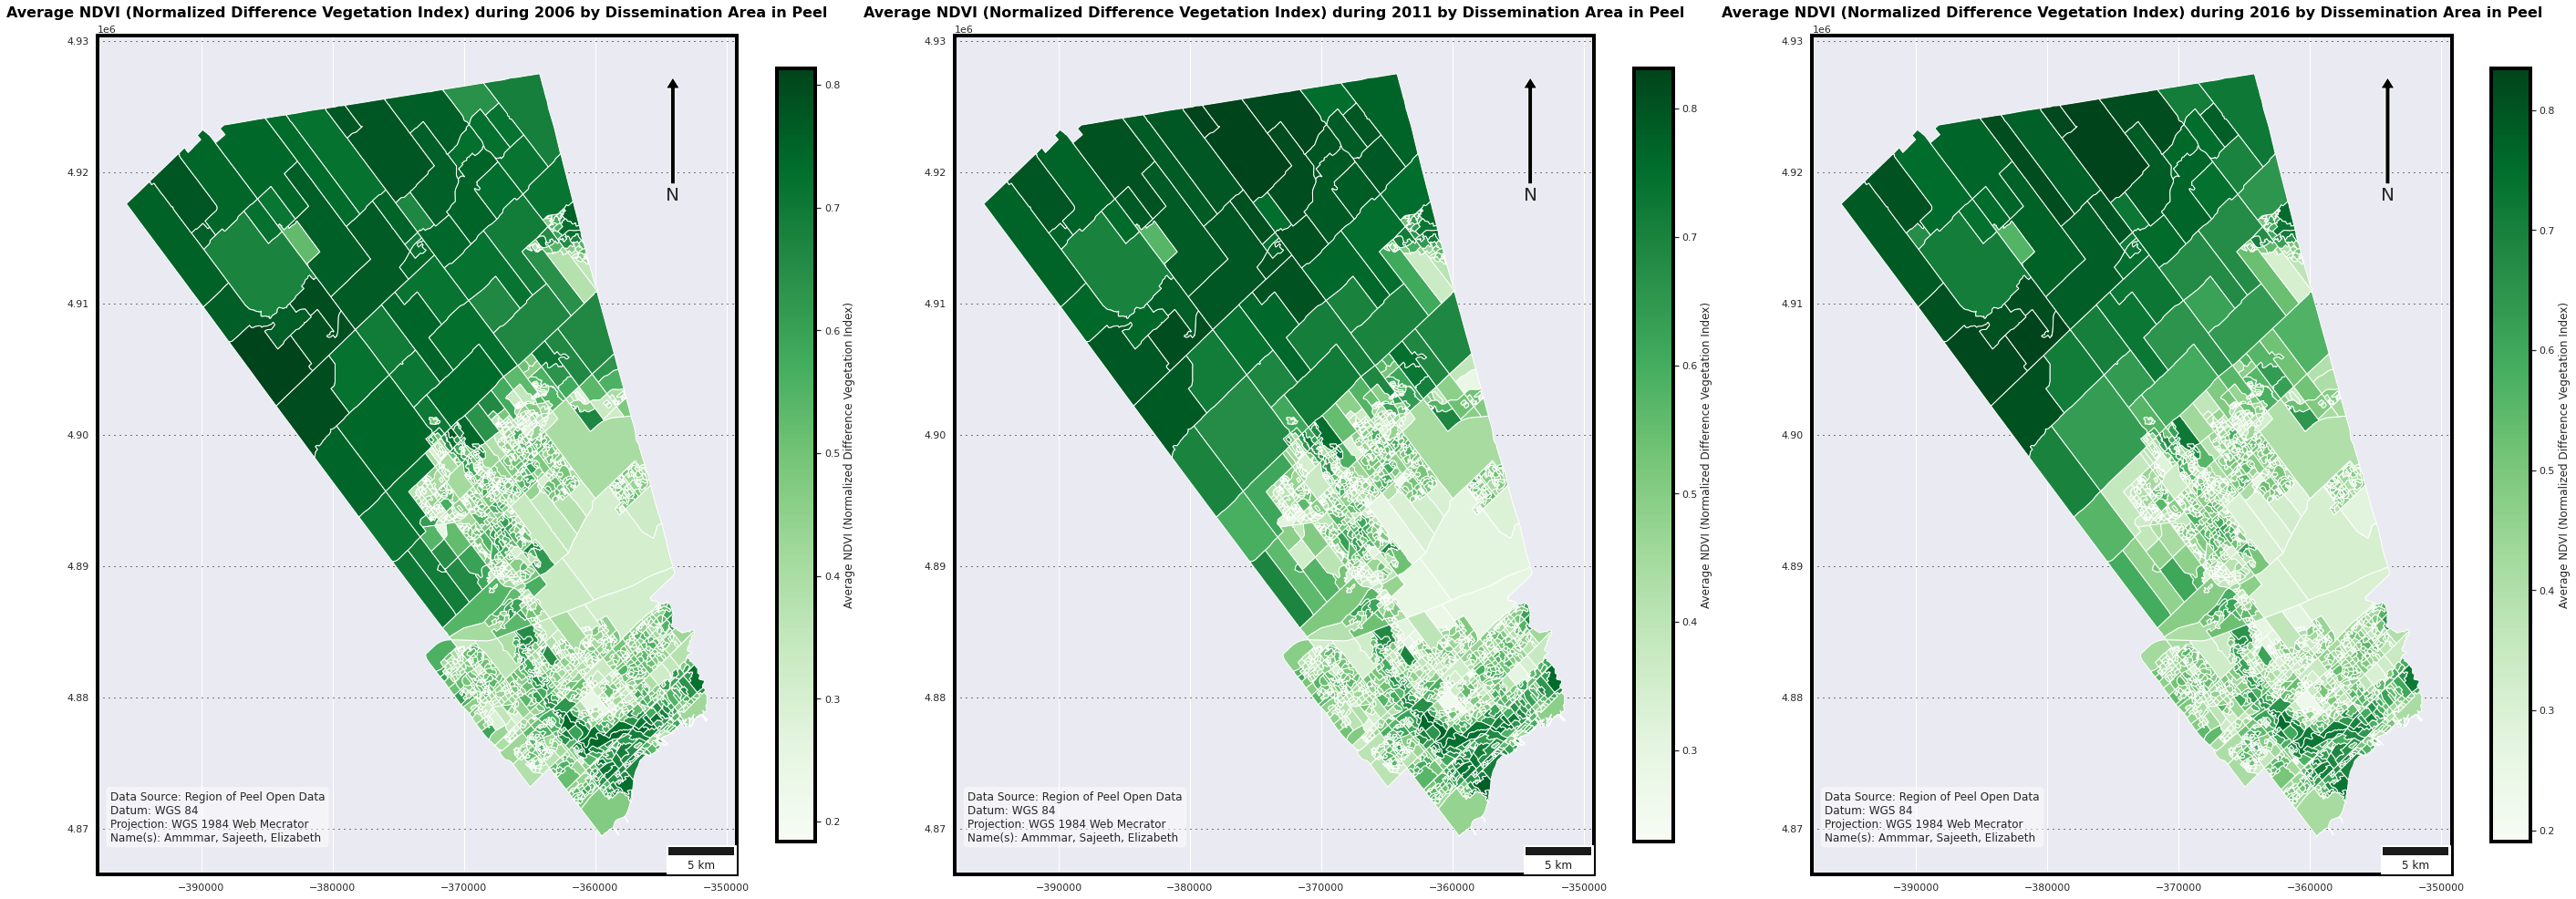

In [208]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                      ncols=3,
                                      figsize=(40, 20));

x, y, arrow_length = 0.9, 0.95, 0.14

mapinfo = f'''Data Source: Region of Peel Open Data
Datum: WGS 84
Projection: WGS 1984 Web Mecrator
Name(s): Ammmar, Sajeeth, Elizabeth'''

mapbox = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Chloropleth Map of NDVI in 2006 for Peel Region
peel_ndvi_2006_df.plot(ax = ax0,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)", 'shrink':0.6},
                      cmap = "Greens")
ax0.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2006 by Dissemination Area in Peel', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_xlabel("")
ax0.set_ylabel("");
ax0.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax0.transAxes)
ax0.add_artist(ScaleBar(1, location = 'lower right'))
ax0.text(0.02, 0.10, mapinfo, transform=ax0.transAxes, va='top', bbox= mapbox)


# Chloropleth Map of NDVI in 2011 for Peel Region
peel_ndvi_2011_df.plot(ax = ax1,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)", 'shrink':0.6},
                      cmap = "Greens")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2011 by Dissemination Area in Peel', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax1.set_xlabel("")
ax1.set_ylabel("");
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)
ax1.add_artist(ScaleBar(1, location = 'lower right'))
ax1.text(0.02, 0.10, mapinfo, transform=ax1.transAxes, va='top', bbox= mapbox)


# Chloropleth Map of NDVI in 2016 for Peel Region
peel_ndvi_2016_df.plot(ax = ax2,
                      column = "mean",
                      legend = True,
                      figsize = [40, 10],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index)", 'shrink':0.6},
                      cmap = "Greens")
ax2.set_title('Average NDVI (Normalized Difference Vegetation Index) during 2016 by Dissemination Area in Peel', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax2.transAxes)
ax2.add_artist(ScaleBar(1, location = 'lower right'));
ax2.text(0.02, 0.10, mapinfo, transform=ax2.transAxes, va='top', bbox= mapbox);

In [27]:
# Correlation Analysis of 2016 NDVI and 2016 NO2
peel_ndvi_2016_df['mean'].corr(peel_no2_2016_df['APMean'])

-0.3072240018684442

In [28]:
# Pearson's Correlation Test for 2016 NDVI and 2016 NO2
stat, p = pearsonr(peel_ndvi_2016_df['mean'], peel_no2_2016_df['APMean'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.3072240019, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


In [29]:
# OLS Linear Model
x = peel_ndvi_2016_df['mean']
Y = peel_no2_2016_df['APMean']
simple_lin_regression_model = sm.OLS(x, Y).fit()
simple_lin_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   mean   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          1.318e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):                        0.00
Time:                        00:37:06   Log-Likelihood:                          685.70
No. Observations:                1650   AIC:                                     -1369.
Df Residuals:                    1649   BIC:                                     -1364.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
APMean         0.0465      0.000    114.822      0.000       0.046       0.047
==============================================================================
Omnibus:                      360.728   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1029.668
Skew:                           1.120   Prob(JB):                    2.57e-224
Kurtosis:                       6.156   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Merge 2016 Pollutant and NDVI Data
peel_ndvi_2016_relevant_info_df = peel_ndvi_2016_df[['DAUID', 'mean']]
peel_ndvi_2016_relevant_info_df.head(5)
peel_2016_df = peel_no2_2016_df.merge(peel_ndvi_2016_relevant_info_df, on = 'DAUID')
peel_2016_df.head(5)

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0      4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1      4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2      4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3      4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4      4094  35210017      35  Ontario    3521     Peel       RM  3521024   

  CCSNAME_x CSDUID_x  ... SACTYPE_y CMAUID_y CMAPUID_y CMANAME_y CMATYPE_y  \
0   Caledon  3521024  ...         1      535     35535   Toronto         B   
1   Caledon  3521024  ...         1      535     35535   Toronto         B   
2   Caledon  3521024  ...         1      535     35535   Toronto         B   
3   Caledon  3521024  ...         1      535     35535   Toronto         B   
4   Caledon  3521024  ...         1      535     35535   Toronto         B   

      CTUID_y CTNAME_y  ADAUID_y    APMean      mean  
0  5350585.07   585.07  35210001  3.485749  0.812255  
1  5350585.07   585.07  35210001  3.391727  0.834277  
2  5350586.01   586.01  35210009  4.349299  0.706434  
3  5350586.02   586.02  35210009  4.382483  0.713679  
4  5350586.02   586.02  35210009  4.400571  0.808633  

[5 rows x 337 columns]

In [42]:
# Spatial Weights
wq = lps.weights.KNN.from_dataframe(peel_2016_df, k=5)

# Row-Standardization
wq.transform = 'r'

# Spatial Lag
peel_2016_df['APMean'] = lps.weights.lag_spatial(wq, peel_2016_df['APMean'])

# Moran's I
y = peel_2016_df.APMean
moran = Moran(y, wq)
moran.I

0.9718282894579969

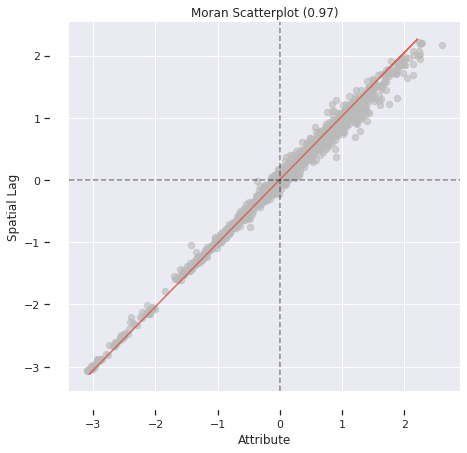

In [43]:
# Moran's I Scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [49]:
# Local Spatial Autocorrelation
lisa = esda.moran.Moran_Local(y, wq)

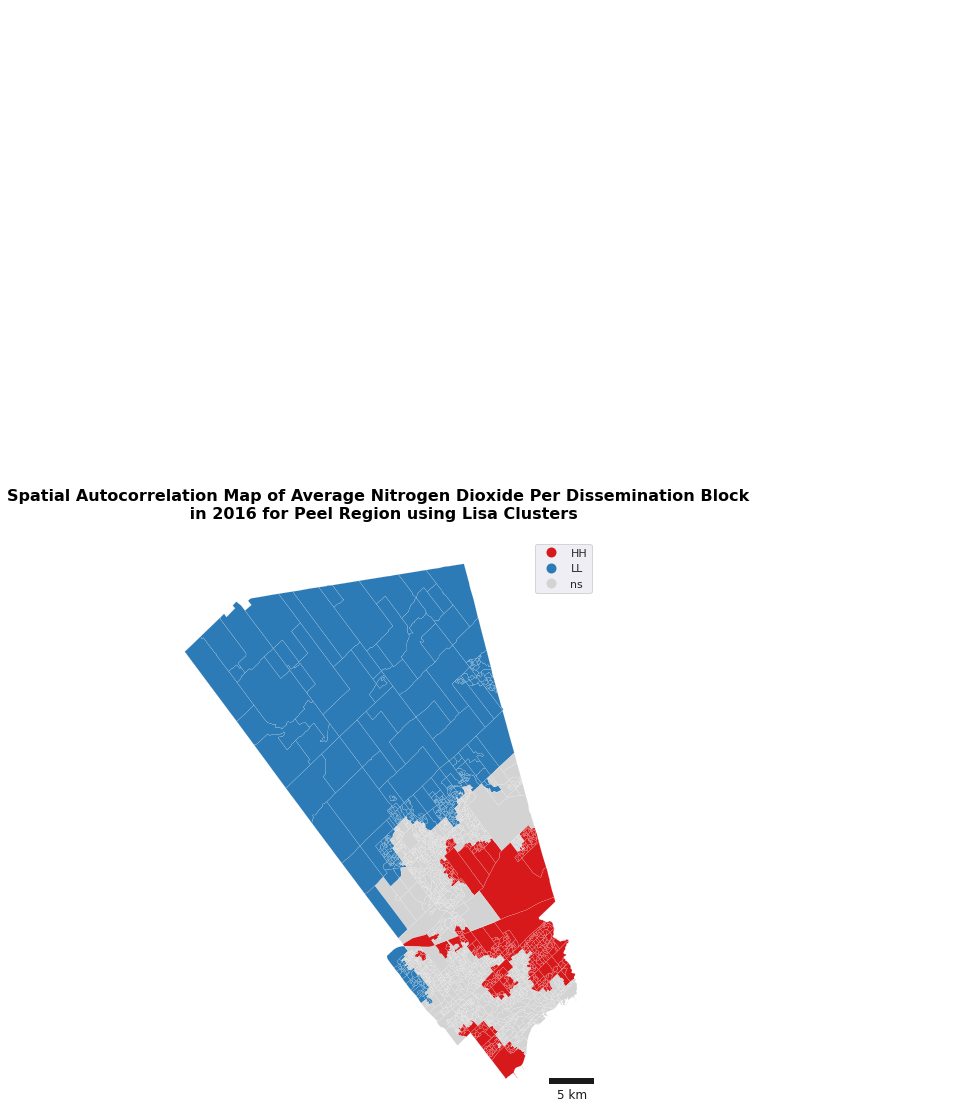

In [178]:
fig, ax = plt.subplots(figsize=(14, 12))
x, y, arrow_length = 0.9, 0.95, 0.14
lisa_cluster(lisa, peel_2016_df, p=0.05, ax=ax)
ax.set_title('Spatial Autocorrelation Map of Average Nitrogen Dioxide Per Dissemination Block \n in 2016 for Peel Region using Lisa Clusters', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax0.transAxes)
ax.add_artist(ScaleBar(1, location = 'lower right'))
plt.show()

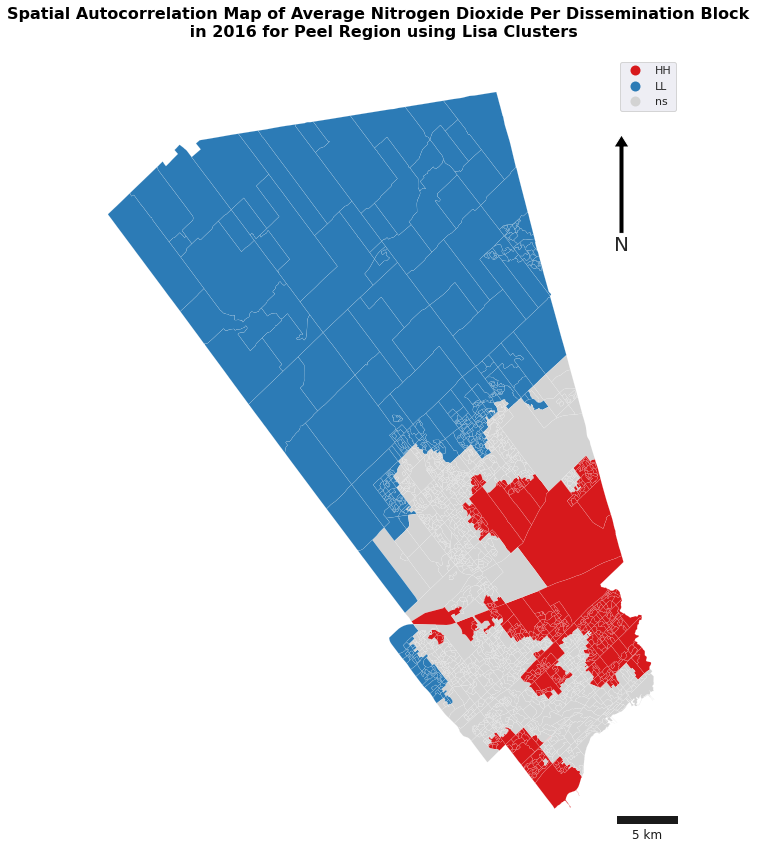

In [183]:
fig, ax = plt.subplots(figsize=(14, 12))
x, y, arrow_length = 0.9, 0.9, 0.14
lisa_cluster(lisa, peel_2016_df, p=0.05, ax=ax)
ax.set_title('Spatial Autocorrelation Map of Average Nitrogen Dioxide Per Dissemination Block \n in 2016 for Peel Region using Lisa Clusters', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '000000'}, pad = 20)
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
ax.add_artist(ScaleBar(1, location = 'lower right'))
plt.show()

In [73]:
peel_2016_df_reg = peel_no2_2016_df.merge(peel_ndvi_2016_relevant_info_df, on = 'DAUID')
peel_2016_df_reg.head(5)

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0      4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1      4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2      4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3      4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4      4094  35210017      35  Ontario    3521     Peel       RM  3521024   

  CCSNAME_x CSDUID_x  ... SACTYPE_y CMAUID_y CMAPUID_y CMANAME_y CMATYPE_y  \
0   Caledon  3521024  ...         1      535     35535   Toronto         B   
1   Caledon  3521024  ...         1      535     35535   Toronto         B   
2   Caledon  3521024  ...         1      535     35535   Toronto         B   
3   Caledon  3521024  ...         1      535     35535   Toronto         B   
4   Caledon  3521024  ...         1      535     35535   Toronto         B   

      CTUID_y CTNAME_y  ADAUID_y    APMean      mean  
0  5350585.07   585.07  35210001  3.485749  0.812255  
1  5350585.07   585.07  35210001  3.391727  0.834277  
2  5350586.01   586.01  35210009  4.349299  0.706434  
3  5350586.02   586.02  35210009  4.382483  0.713679  
4  5350586.02   586.02  35210009  4.400571  0.808633  

[5 rows x 337 columns]

In [ ]:
# Weights matrix and row-standardization
w = weights.KNN.from_dataframe(peel_2016_df_reg, k=5)
w.transform = 'R'
w

In [78]:
y = peel_2016_df_reg['APMean'].values
y

array([ 3.48574915,  3.39172706,  4.34929923, ..., 13.98970067,
       11.72546004, 12.42085329])

In [83]:
peel_2016_df_reg.APMean.dtype

dtype('float64')

In [88]:
peel_2016_df_reg.rename(columns = {'mean': 'ndvi'}, inplace = True)
peel_2016_df_reg.head(5)

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0      4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1      4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2      4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3      4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4      4094  35210017      35  Ontario    3521     Peel       RM  3521024   

  CCSNAME_x CSDUID_x  ... SACTYPE_y CMAUID_y CMAPUID_y CMANAME_y CMATYPE_y  \
0   Caledon  3521024  ...         1      535     35535   Toronto         B   
1   Caledon  3521024  ...         1      535     35535   Toronto         B   
2   Caledon  3521024  ...         1      535     35535   Toronto         B   
3   Caledon  3521024  ...         1      535     35535   Toronto         B   
4   Caledon  3521024  ...         1      535     35535   Toronto         B   

      CTUID_y CTNAME_y  ADAUID_y    APMean      ndvi  
0  5350585.07   585.07  35210001  3.485749  0.812255  
1  5350585.07   585.07  35210001  3.391727  0.834277  
2  5350586.01   586.01  35210009  4.349299  0.706434  
3  5350586.02   586.02  35210009  4.382483  0.713679  
4  5350586.02   586.02  35210009  4.400571  0.808633  

[5 rows x 337 columns]

In [89]:
x = peel_2016_df_reg['ndvi'].values
x

array([0.81225533, 0.83427672, 0.70643437, ..., 0.37372247, 0.46300441,
       0.43127345])

In [92]:
# Drop null values
peel_2016_df_reg.dropna()
peel_2016_df_reg.head(5)

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0      4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1      4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2      4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3      4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4      4094  35210017      35  Ontario    3521     Peel       RM  3521024   

  CCSNAME_x CSDUID_x  ... SACTYPE_y CMAUID_y CMAPUID_y CMANAME_y CMATYPE_y  \
0   Caledon  3521024  ...         1      535     35535   Toronto         B   
1   Caledon  3521024  ...         1      535     35535   Toronto         B   
2   Caledon  3521024  ...         1      535     35535   Toronto         B   
3   Caledon  3521024  ...         1      535     35535   Toronto         B   
4   Caledon  3521024  ...         1      535     35535   Toronto         B   

      CTUID_y CTNAME_y  ADAUID_y    APMean      ndvi  
0  5350585.07   585.07  35210001  3.485749  0.812255  
1  5350585.07   585.07  35210001  3.391727  0.834277  
2  5350586.01   586.01  35210009  4.349299  0.706434  
3  5350586.02   586.02  35210009  4.382483  0.713679  
4  5350586.02   586.02  35210009  4.400571  0.808633  

[5 rows x 337 columns]

In [96]:
# Number of missing values
peel_2016_df.isnull().sum()

OBJECTID    0
DAUID       0
PRUID_x     0
PRNAME_x    0
CDUID_x     0
           ..
CTUID_y     0
CTNAME_y    0
ADAUID_y    0
APMean      0
mean        0
Length: 337, dtype: int64

In [97]:
peel_2016_df.isna().sum()

OBJECTID    0
DAUID       0
PRUID_x     0
PRNAME_x    0
CDUID_x     0
           ..
CTUID_y     0
CTNAME_y    0
ADAUID_y    0
APMean      0
mean        0
Length: 337, dtype: int64

In [93]:
x = peel_2016_df_reg['ndvi'].values
x

array([0.81225533, 0.83427672, 0.70643437, ..., 0.37372247, 0.46300441,
       0.43127345])

In [100]:
peel_2016_df_reg['ndvi'].astype('float')
x = peel_2016_df_reg['ndvi'].values

In [101]:
peel_2016_df_reg['APMean'].astype('float')
y = peel_2016_df_reg['APMean'].values
y

array([ 3.48574915,  3.39172706,  4.34929923, ..., 13.98970067,
       11.72546004, 12.42085329])

In [104]:
baseline_sp_ols_reg = spreg.OLS(peel_2016_df_reg[['APMean']].values, peel_2016_df_reg[['ndvi']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1650
Mean dependent var  :      9.4888                Number of Variables   :           2
S.D. dependent var  :      2.0934                Degrees of Freedom    :        1648
R-squared           :      0.0944
Adjusted R-squared  :      0.0938
Sum squared residual:    6544.586                F-statistic           :    171.7610
Sigma-square        :       3.971                Prob(F-statistic)     :    2.11e-37
S.E. of regression  :       1.993                Log likelihood        :   -3477.985
Sigma-square ML     :       3.966                Akaike info criterion :    6959.971
S.E of regression ML:      1.9916                Schwarz criterion     :    6970.788

-----------------------------------------------------------------------------

In [106]:
# Create weights
w_ndvi = weights.KNN.from_dataframe(peel_2016_df_reg, k = 5)
# Assign spatial lag based on the pool values
lagged = peel_2016_df_reg.assign(w_ndvi = weights.spatial_lag.lag_spatial(w_ndvi, peel_2016_df_reg['ndvi'].values))
lagged.head(5)

OBJECTID     DAUID PRUID_x PRNAME_x CDUID_x CDNAME_x CDTYPE_x CCSUID_x  \
0      4055  35211603      35  Ontario    3521     Peel       RM  3521024   
1      4067  35211604      35  Ontario    3521     Peel       RM  3521024   
2      4092  35210014      35  Ontario    3521     Peel       RM  3521024   
3      4093  35210015      35  Ontario    3521     Peel       RM  3521024   
4      4094  35210017      35  Ontario    3521     Peel       RM  3521024   

  CCSNAME_x CSDUID_x  ... CMAUID_y CMAPUID_y CMANAME_y CMATYPE_y     CTUID_y  \
0   Caledon  3521024  ...      535     35535   Toronto         B  5350585.07   
1   Caledon  3521024  ...      535     35535   Toronto         B  5350585.07   
2   Caledon  3521024  ...      535     35535   Toronto         B  5350586.01   
3   Caledon  3521024  ...      535     35535   Toronto         B  5350586.02   
4   Caledon  3521024  ...      535     35535   Toronto         B  5350586.02   

  CTNAME_y  ADAUID_y    APMean      ndvi    w_ndvi  
0   585.07  35210001  3.485749  0.812255  3.845931  
1   585.07  35210001  3.391727  0.834277  4.004211  
2   586.01  35210009  4.349299  0.706434  3.633026  
3   586.02  35210009  4.382483  0.713679  3.609283  
4   586.02  35210009  4.400571  0.808633  3.697848  

[5 rows x 338 columns]

In [108]:
sp_lag_reg = spreg.OLS(lagged[['APMean']].values, lagged[['w_ndvi']].values)
print(sp_lag_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1650
Mean dependent var  :      9.4888                Number of Variables   :           2
S.D. dependent var  :      2.0934                Degrees of Freedom    :        1648
R-squared           :      0.0864
Adjusted R-squared  :      0.0859
Sum squared residual:    6601.963                F-statistic           :    155.9454
Sigma-square        :       4.006                Prob(F-statistic)     :    2.93e-34
S.E. of regression  :       2.002                Log likelihood        :   -3485.187
Sigma-square ML     :       4.001                Akaike info criterion :    6974.374
S.E of regression ML:      2.0003                Schwarz criterion     :    6985.191

-----------------------------------------------------------------------------

In [111]:
# Spatial Lag Endogenous Regression 
sp_end_lag_reg = spreg.GM_Lag(peel_2016_df_reg[['APMean']].values, peel_2016_df_reg[['ndvi']].values, w = w)
print(sp_end_lag_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1650
Mean dependent var  :      9.4888                Number of Variables   :           3
S.D. dependent var  :      2.0934                Degrees of Freedom    :        1647
Pseudo R-squared    :      0.9443
Spatial Pseudo R-squared:  0.1708

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       1.9214827       0.3437820       5.5892470       0.0000000
               var_1      -1.3693236       0.2173806      -6.2991977       0.0000000
           W_dep_var       0.8606135       0.0271925      3

In [124]:
# Import 2011 Dissemination Area Boundary Data
peel_2011_da_boundaries = gpd.read_file('/content/drive/MyDrive/GGR442_Project3_Data/RegionOfPeel2011_FeaturesToJSO2.geojson')
peel_2011_da_boundaries.head(10)

In [124]:
# Description of Peel 2011 DA Boundaries 
print(peel_2011_da_boundaries.shape)
peel_2011_da_boundaries.dtypes

In [124]:
peel_2011_da_boundaries['DAUID'] = pd.to_numeric(peel_2011_da_boundaries['DAUID'])
peel_2011_da_boundaries.dtypes

In [124]:
# Merge Peel Boundary Files to 2011 NO2 Pollution
peel_no2_2011_df = peel_da_boundaries.merge(no2_2011_data_df, on = 'DAUID')
peel_no2_2011_df

In [124]:
# Chloropleth Map of NO2 Air Pollution in 2011 for Peel Region
peel_no2_2011_df.plot(column = "APMean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NO2 (Nitrogen Dioxide) Air Pollution in 2011 by Dissemination Area in Peel"},
                      cmap = "Oranges");